# Anlysis for Scalar Field simulation

In [1]:
import numpy as np
import concurrent.futures
from tqdm.notebook import tqdm
import os
import matplotlib as mpt
import matplotlib.pyplot as plt
from matplotlib import style
from uncertainties import correlated_values
import pylab
#speed things up
import numba
from numba import njit
from numba import jit
from numba import prange
from numba.experimental import jitclass
from scipy.optimize import curve_fit
#from numba_progress import ProgressBar
#from scipy.ndimage import convolve, generate_binary_structure
from timeit import default_timer as timer
from time import sleep
#style designed by me for plottin (version 2)
plt.style.use(['science','notebook','grid'])
plt.rcParams['mathtext.fontset'] = 'stix'

fig = (9,6)
params = {'figure.figsize': fig,
        'legend.fontsize': 2.5*fig[1],
         'axes.labelsize': 2.5*fig[1],
         'axes.titlesize': 3*fig[1],
         'xtick.labelsize': 2*fig[1],
         'ytick.labelsize': 2*fig[1],
         'font.family' : 
          'Stixgeneral'
          }
pylab.rcParams.update(params)

In [2]:
def getColor(c, N, idx):
    cmap=mpt.colormaps.get_cmap(c)
    norm = mpt.colors.Normalize(vmin=0.0, vmax=N - 1)
    return cmap(norm(idx))

In [3]:
#keys needed to acced all the data
name_phi = os.getcwd() + '/phi' + '/phi_'   #phi txt has double underscore!!!! (my bad)
name_spec = os.getcwd() + '/spectrum' + '/spec' #this is in the usual convention
key_phi = np.flip(np.linspace(0.005, 0.2, 50))   #below there are the keys to access the files
mhat1 = np.linspace (0.01, 0.2, 10)
mhat2 = np.linspace(0.21, 1, 20)
key_corr = np.flip(np.concatenate((mhat1,mhat2)))

In [1]:
def blocking(data, bin_size):
    nb = int(len(data)/bin_size) #num of blocks
    #lets build the blocks with list comprehension
    blocks = [data[i*bin_size : (i+1)*bin_size] for i in range(nb)]
    averages = np.array([b.mean() for b in blocks]) #average for each block
    return averages.std(ddof=1)/np.sqrt(nb) if nb > 1 else 0

## Analysis for $<\phi^2>$

### With over relaxation 

In [5]:
phi = np.zeros((len(key_phi),10000))
for idx, mhat in enumerate(key_phi):
    Nt = int(10/mhat)
    phi[idx] = np.loadtxt(f'{name_phi}_{mhat}.txt', unpack=True)/(Nt**2)

In [6]:
skip = 1808
#for bloxking you have to drop the first 1808 elements

In [26]:
avg_phi = np.array([phi[i][skip:].mean() for i in range(len(key_phi))])

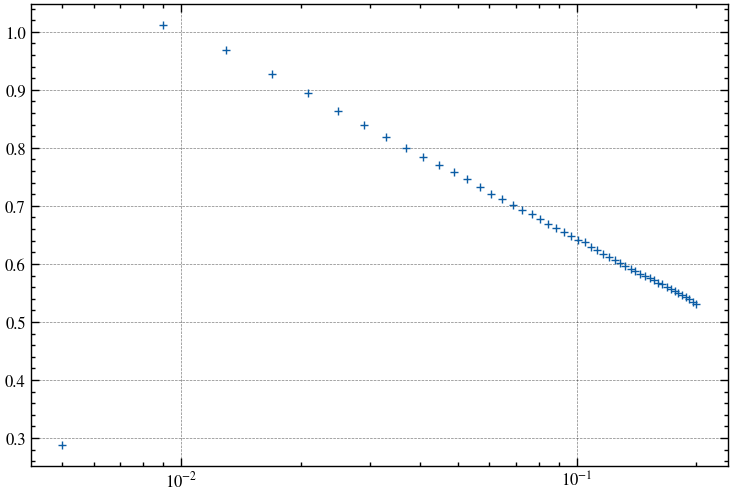

In [8]:
plt.plot(key_phi, avg_phi, '+')
plt.xscale('log')

  0%|          | 0/3999 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

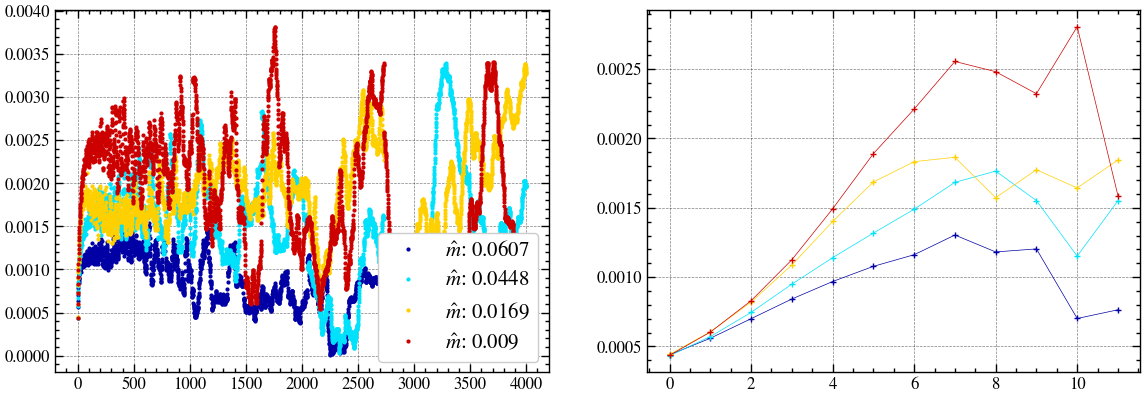

In [11]:
#just looking at the error estimation for diff parameters
err = []
err1 = []
err2 = []
err3 = []
skip1 = 1808
fig, axes =plt.subplots(1,2, figsize=(14, 4.7))
ax = axes[0]
for k in tqdm(range(1, 4000)):
    err.append(blocking(phi[35][skip1:], k))
    err1.append(blocking(phi[39][skip1:], k))
    err2.append(blocking(phi[43][skip1:], k))
    err3.append(blocking(phi[45][skip1:], k))
    
ax.plot(list(range(1,4000)), err, '.',markersize='4', linewidth='.5',color=getColor('jet', 30, 1),label=r'$\hat{m}$: 'f'{round(key_phi[35],4)}')
ax.plot(list(range(1,4000)), err1, '.',markersize='4', linewidth='.5',color=getColor('jet', 30, 10),label=r'$\hat{m}$: 'f'{round(key_phi[39],4)}')
ax.plot(list(range(1,4000)), err2, '.',markersize='4', linewidth='.5',color=getColor('jet', 30, 20),label=r'$\hat{m}$: 'f'{round(key_phi[46],4)}')
ax.plot(list(range(1,4000)), err3, '.',markersize='4', linewidth='.5',color=getColor('jet', 30, 27),label=r'$\hat{m}$: 'f'{round(key_phi[48],4)}')
ax.legend(loc = 'lower right')


ax = axes[1] 
err = []
err1 = []
err2 = []
err3 = []
for k in tqdm(range(0, 12)):
    err.append(blocking(phi[35][skip1:], 2**k))
    err1.append(blocking(phi[39][skip1:], 2**k))
    err2.append(blocking(phi[43][skip1:], 2**k))
    err3.append(blocking(phi[45][skip1:], 2**k))
    
ax.plot(np.arange(0,12), err, '-+',markersize='4', linewidth='.5',color=getColor('jet', 30, 1),label=r'$\hat{m}$: 'f'{round(key_phi[35],4)}')
ax.plot(np.arange(0,12), err1, '-+',markersize='4', linewidth='.5',color=getColor('jet', 30, 10),label=r'$\hat{m}$: 'f'{round(key_phi[39],4)}')
ax.plot(np.arange(0,12), err2, '-+',markersize='4', linewidth='.5',color=getColor('jet', 30, 20),label=r'$\hat{m}$: 'f'{round(key_phi[46],4)}')
ax.plot(np.arange(0,12), err3, '-+',markersize='4', linewidth='.5',color=getColor('jet', 30, 27),label=r'$\hat{m}$: 'f'{round(key_phi[48],4)}')

#13ax.legend(loc = 'upper left')

  0%|          | 0/12 [00:00<?, ?it/s]

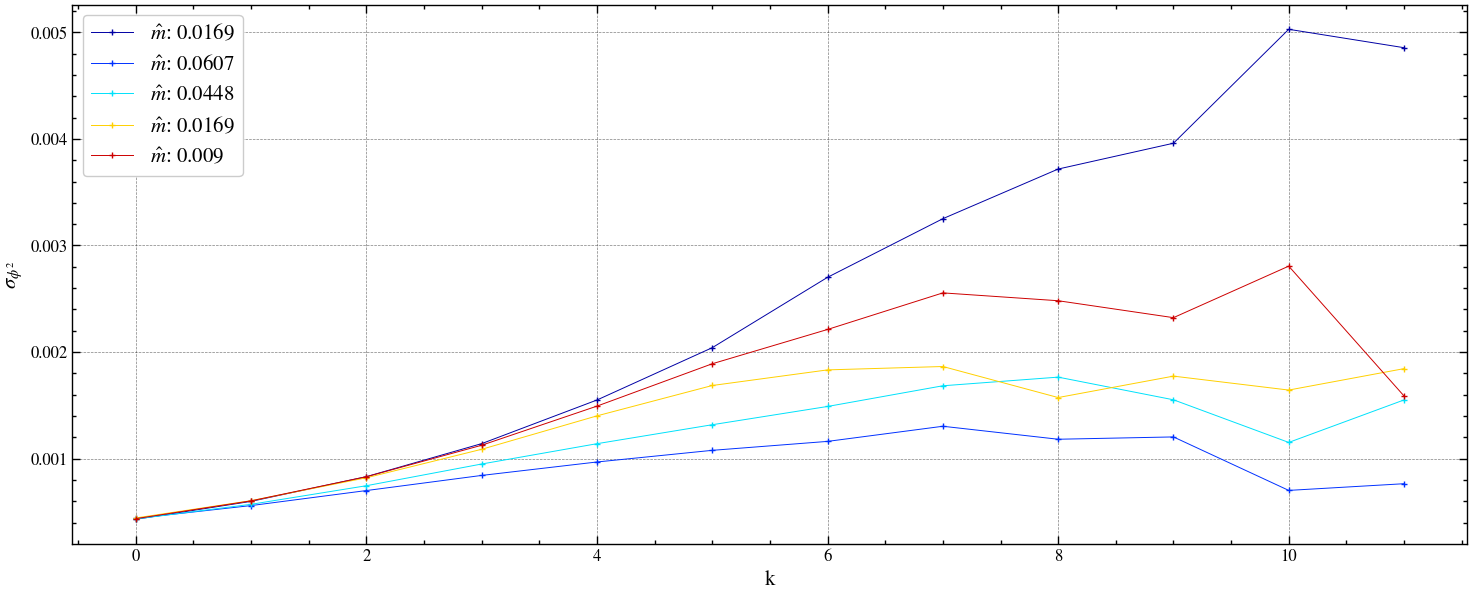

In [21]:
plt.figure(figsize=(18,7))
err = []
err1 = []
err2 = []
err3 = []
err4 = []

for k in tqdm(range(0, 12)):
    err4.append(blocking(phi[46][skip1:], 2**k))
    err.append(blocking(phi[35][skip1:], 2**k))
    err1.append(blocking(phi[39][skip1:], 2**k))
    err2.append(blocking(phi[43][skip1:], 2**k))
    err3.append(blocking(phi[45][skip1:], 2**k))

    
    
plt.plot(np.arange(0,12), err4, '-+',markersize='4', linewidth='.7',color=getColor('jet', 30, 1),label=r'$\hat{m}$: 'f'{round(key_phi[46],4)}')    
plt.plot(np.arange(0,12), err, '-+',markersize='4', linewidth='.7',color=getColor('jet', 30, 5),label=r'$\hat{m}$: 'f'{round(key_phi[35],4)}')
plt.plot(np.arange(0,12), err1, '-+',markersize='4', linewidth='.7',color=getColor('jet', 30, 10),label=r'$\hat{m}$: 'f'{round(key_phi[39],4)}')
plt.plot(np.arange(0,12), err2, '-+',markersize='4', linewidth='.7',color=getColor('jet', 30, 20),label=r'$\hat{m}$: 'f'{round(key_phi[46],4)}')
plt.plot(np.arange(0,12), err3, '-+',markersize='4', linewidth='.7',color=getColor('jet', 30, 27),label=r'$\hat{m}$: 'f'{round(key_phi[48],4)}')
plt.xlabel('k')
plt.ylabel(r'$\sigma_{\phi^2}$')
plt.legend()
plt.savefig('errore', dpi=500)

In [30]:
#mask for the range of values needed
mask = key_phi < 0.1
mask *= key_phi > 0.005

In [11]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [31]:
#Error estimation
dphi = np.array([blocking(phi[idx][skip:], 2**11) for idx in range(0,50)])
dphi_fit = dphi[mask]
phi_fit = avg_phi[mask]

#### Fit for $\langle \phi^2 \rangle$ 

In [2]:
def linear(x, a, b):
    return a*x + b

In [33]:
x = np.log(key_phi[mask])

$a$ = -0.1586 ± 0.0005
$b$ = 0.2776 ± 0.0014
chi2, ndof: 27.906755668447794 23
0.9964669175237898 0.0033603493058630366


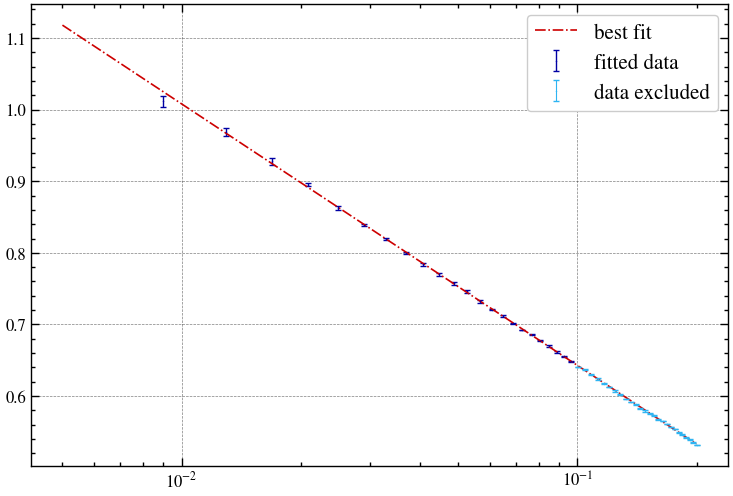

In [19]:
opt, cov = curve_fit(linear, x, phi_fit,sigma=dphi_fit, absolute_sigma=True)
w = 1/(dphi_fit)**2
chi2 = ((w*(phi_fit-linear(x,*opt))**2)).sum()
ndof = len(x)

print(fr'$a$ = {opt[0]:.4f} ± {np.sqrt(cov[0][0]):.4f}')
print(fr'$b$ = {opt[1]:.4f} ± {np.sqrt(cov[1][1]):.4f}')
print ('chi2, ndof:',chi2, ndof)

print(-2*np.pi * opt[0], 2*np.pi*(np.sqrt(cov[0][0])))

x = key_phi[mask]
p = np.linspace(min(key_phi), max(key_phi), 1000)
plt.errorbar(x, phi_fit , dphi_fit ,fmt='+',capsize=2 , elinewidth=1,linewidth=1,markersize=.6,color=getColor('jet', 30, 1), label=rf'fitted data')
plt.plot(p , linear(np.log(p), *opt),'-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
plt.errorbar(key_phi[np.logical_not(mask)][:-1], avg_phi[np.logical_not(mask)][:-1] , dphi[np.logical_not(mask)][:-1],fmt='+',capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6,label=rf'data excluded',color=getColor('turbo', 30, 7))
plt.xscale('log')
plt.legend()

$a$ = -0.1585 ± 0.0002
$b$ = 0.2775 ± 0.0005
chi2, ndof: 89.76090861642062 49
0.9959326966323879 0.0014132988847519162


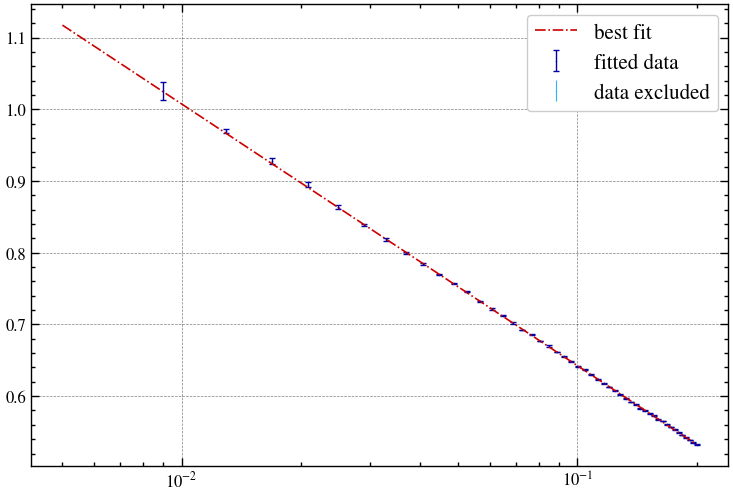

In [17]:
x = np.log(key_phi[mask])
mask = key_phi > 0.005
dphi = np.array([blocking(phi[idx], 800) for idx in range(0,50)])
dphi_fit = dphi[mask]
phi_fit = avg_phi[mask]

opt, cov = curve_fit(linear, x, phi_fit,sigma=dphi_fit, absolute_sigma=True)
w = 1/(dphi_fit)**2
chi2 = ((w*(phi_fit-linear(x,*opt))**2)).sum()
ndof = len(x)

print(fr'$a$ = {opt[0]:.4f} ± {np.sqrt(cov[0][0]):.4f}')
print(fr'$b$ = {opt[1]:.4f} ± {np.sqrt(cov[1][1]):.4f}')
print ('chi2, ndof:',chi2, ndof)

print(-2*np.pi * opt[0], 2*np.pi*(np.sqrt(cov[0][0])))

x = key_phi[mask]
p = np.linspace(min(key_phi), max(key_phi), 1000)
plt.errorbar(x, phi_fit , dphi_fit ,fmt='+',capsize=2 , elinewidth=1,linewidth=1,markersize=.6,color=getColor('jet', 30, 1), label=rf'fitted data')
plt.plot(p , linear(np.log(p), *opt),'-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
plt.errorbar(key_phi[np.logical_not(mask)][:-1], avg_phi[np.logical_not(mask)][:-1] , dphi[np.logical_not(mask)][:-1],fmt='+',capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6,label=rf'data excluded',color=getColor('turbo', 30, 7))
plt.xscale('log')
plt.legend()

In [ ]:
p0=(1,1)
opt, cov = curve_fit(quadratic, etas[mask], var_q[0][mask], p0,sigma=dvar_q[0][mask], absolute_sigma=True)

w = 1/(dvar_q[0][mask]**2)
chi2 = ((w*(var_q[0][mask]-quadratic(etas[mask],*opt))**2)).sum()
ndof=len(etas[mask])-len(p0)

### No over relaxation 

In [34]:
name_phinor = os.getcwd() + '/phi_nor' + '/phi_'

In [35]:
phi_nor = np.zeros((len(key_phi),10000))
for idx, mhat in tqdm(enumerate(key_phi)):
    Nt = int(10/mhat)
    phi_nor[idx] = np.loadtxt(f'{name_phinor}_{mhat}.txt', unpack=True)/(Nt**2)

0it [00:00, ?it/s]

In [36]:
skip = 1808

In [37]:
avg_phi_nor = np.array([phi_nor[i][skip:].mean() for i in range(len(key_phi))])

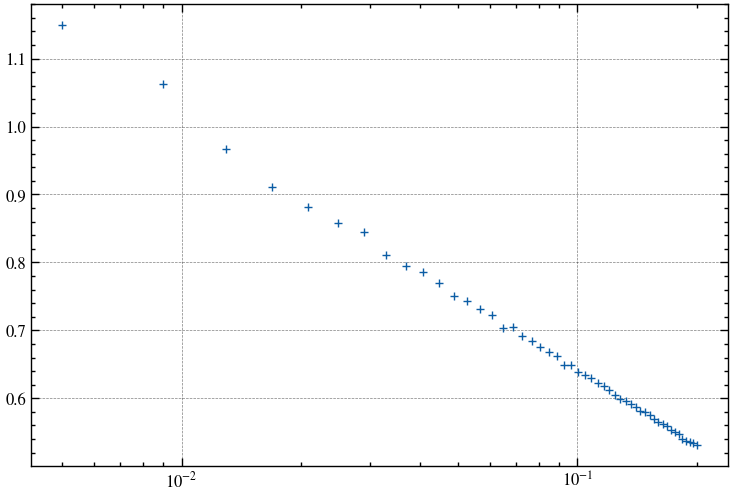

In [38]:
plt.plot(key_phi, avg_phi_nor, '+')
plt.xscale('log')

In [39]:
#same mask
mask = key_phi < 0.1
mask *= key_phi > 0.005

In [40]:
dphi_nor = np.array([blocking(phi_nor[idx][skip:], 2**11) for idx in range(0,50)])
dphi_fit_nor = dphi_nor[mask]
phi_fit_nor = avg_phi_nor[mask]

$a$ = -0.1582 ± 0.0015
$b$ = 0.2764 ± 0.0040
chi2, ndof: 33.69462903322646 23
0.9941133335495722 0.009444798502068313


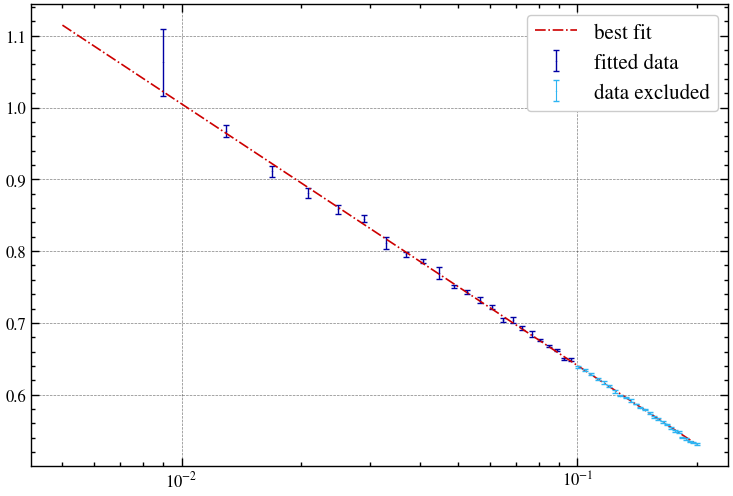

In [27]:
x = np.log(key_phi[mask])
opt, cov = curve_fit(linear, x, phi_fit_nor,sigma=dphi_fit_nor, absolute_sigma=True)
w = 1/(dphi_fit_nor)**2
chi2 = ((w*(phi_fit_nor-linear(x,*opt))**2)).sum()
ndof = len(x)

print(fr'$a$ = {opt[0]:.4f} ± {np.sqrt(cov[0][0]):.4f}')
print(fr'$b$ = {opt[1]:.4f} ± {np.sqrt(cov[1][1]):.4f}')
print ('chi2, ndof:',chi2, ndof)

print(-2*np.pi * opt[0], 2*np.pi*(np.sqrt(cov[0][0])))

x = key_phi[mask]
p = np.linspace(min(key_phi), max(key_phi), 1000)
plt.errorbar(x, phi_fit_nor , dphi_fit_nor ,fmt='+',capsize=2 , elinewidth=1,linewidth=1,markersize=.6,color=getColor('jet', 30, 1), label=rf'fitted data')
plt.plot(p , linear(np.log(p), *opt),'-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
plt.errorbar(key_phi[np.logical_not(mask)][:-1], avg_phi_nor[np.logical_not(mask)][:-1] , dphi_nor[np.logical_not(mask)][:-1],fmt='+',capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6,label=rf'data excluded',color=getColor('turbo', 30, 7))
plt.xscale('log')
plt.legend()

**********

In [41]:
dphi = np.array([blocking(phi[idx][skip:], 2**11) for idx in range(0,50)])
dphi_fit = dphi[mask]
phi_fit = avg_phi[mask]

In [42]:
dphi_nor = np.array([blocking(phi_nor[idx][skip:], 2**11) for idx in range(0,50)])
dphi_fit_nor = dphi_nor[mask]
phi_fit_nor = avg_phi_nor[mask]

$a$ = -0.1586 ± 0.0005
$b$ = 0.2776 ± 0.0014
chi2, ndof: 27.906755668447794 23
0.9964669175237898 0.0033603493058630366
$a$ = -0.1582 ± 0.0015
$b$ = 0.2764 ± 0.0040
chi2, ndof: 33.69462903322646 23
0.9941133335495722 0.009444798502068313


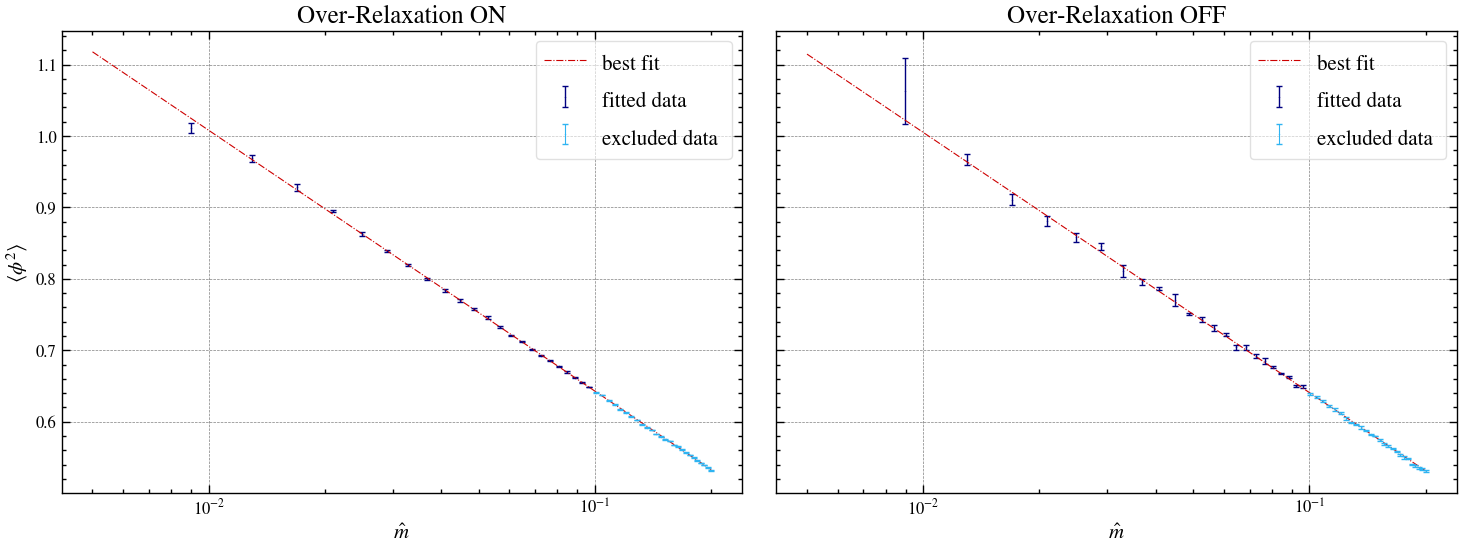

In [51]:
#comparison fra OR off e on
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
ax = axes[0]
x = np.log(key_phi[mask])
opt, cov = curve_fit(linear, x, phi_fit,sigma=dphi_fit, absolute_sigma=True)
w = 1/(dphi_fit)**2
chi2 = ((w*(phi_fit-linear(x,*opt))**2)).sum()
ndof = len(x)

print(fr'$a$ = {opt[0]:.4f} ± {np.sqrt(cov[0][0]):.4f}')
print(fr'$b$ = {opt[1]:.4f} ± {np.sqrt(cov[1][1]):.4f}')
print ('chi2, ndof:',chi2, ndof)

print(-2*np.pi * opt[0], 2*np.pi*(np.sqrt(cov[0][0])))

x = key_phi[mask]
p = np.linspace(min(key_phi), max(key_phi), 1000)
ax.errorbar(x, phi_fit , dphi_fit ,fmt='+',capsize=2 , elinewidth=1,linewidth=1,markersize=.6,color=getColor('jet', 30, 0), label=rf'fitted data')
ax.plot(p , linear(np.log(p), *opt),'-.',markersize='6', linewidth='.8',color=getColor('jet', 30, 27), label='best fit')
ax.errorbar(key_phi[np.logical_not(mask)][:-1], avg_phi[np.logical_not(mask)][:-1] , dphi[np.logical_not(mask)][:-1],fmt='+',capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6,label=rf'excluded data ',color=getColor('turbo', 30, 7))
ax.set_xscale('log')
ax.set_title('Over-Relaxation ON')
ax.set_xlabel(r'$\hat{m}$')
ax.set_ylabel(r'$\langle \phi^2 \rangle$')
ax.legend(loc='upper right',fancybox=True, borderpad=.4, frameon=True, framealpha=.6, handlelength=2, handleheight=1.6, labelspacing=.5)
##############################2nd sub plot things#####################################
ax = axes[1]
x = np.log(key_phi[mask])
opt, cov = curve_fit(linear, x, phi_fit_nor,sigma=dphi_fit_nor, absolute_sigma=True)
w = 1/(dphi_fit_nor)**2
chi2 = ((w*(phi_fit_nor-linear(x,*opt))**2)).sum()
ndof = len(x)

print(fr'$a$ = {opt[0]:.4f} ± {np.sqrt(cov[0][0]):.4f}')
print(fr'$b$ = {opt[1]:.4f} ± {np.sqrt(cov[1][1]):.4f}')
print ('chi2, ndof:',chi2, ndof)

print(-2*np.pi * opt[0], 2*np.pi*(np.sqrt(cov[0][0])))

x = key_phi[mask]
p = np.linspace(min(key_phi), max(key_phi), 1000)
ax.errorbar(x, phi_fit_nor , dphi_fit_nor ,fmt='+',capsize=2 , elinewidth=1,linewidth=1,markersize=.6,color=getColor('jet', 30, 0), label=rf'fitted data')
ax.plot(p , linear(np.log(p), *opt),'-.',markersize='6', linewidth='.8',color=getColor('jet', 30, 27), label='best fit')
ax.errorbar(key_phi[np.logical_not(mask)][:-1], avg_phi_nor[np.logical_not(mask)][:-1] , dphi_nor[np.logical_not(mask)][:-1],fmt='+',capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6,label=rf'excluded data ',color=getColor('turbo', 30, 7))
ax.set_xscale('log')
ax.set_title('Over-Relaxation OFF')
ax.set_xlabel(r'$\hat{m}$')
ax.legend(loc='upper right',fancybox=True, borderpad=.4, frameon=True, framealpha=.6, handlelength=2, handleheight=1.6, labelspacing=.5)
plt.subplots_adjust(wspace=.05, hspace=0)
fig.savefig('fit_phi', dpi=500)

## Correlations 

In [59]:
name_phi = os.getcwd() + '/phi' + '/phi_'   #phi txt has double underscore!!!! (my bad)
name_spec = os.getcwd() + '/spectrum' + '/spec' #this is in the usual convention
key_phi = np.flip(np.linspace(0.005, 0.2, 50))   #below are the keys to access the files
mhat1 = np.linspace (0.01, 0.2, 10)
mhat2 = np.linspace(0.21, 1, 20)
key_corr = np.flip(np.concatenate((mhat1,mhat2)))
key_corr = key_corr[:-2]

In [7]:
key_corr

array([1.        , 0.95842105, 0.91684211, 0.87526316, 0.83368421,
       0.79210526, 0.75052632, 0.70894737, 0.66736842, 0.62578947,
       0.58421053, 0.54263158, 0.50105263, 0.45947368, 0.41789474,
       0.37631579, 0.33473684, 0.29315789, 0.25157895, 0.21      ,
       0.2       , 0.17888889, 0.15777778, 0.13666667, 0.11555556,
       0.09444444, 0.07333333, 0.05222222])

In [67]:
SIZE_BLOCK = 2**8
#SIZE_BLOCK = 200
R = 100
SKIP_CORR = 1808 
FIT_STOP_FRACTION = 1/3
PLOT_CHI2NORM = False

In [55]:
#Function for fitting the correlators
def corr_fit(x, a):
        return np.exp(-a*x) / (2 * a)

In [56]:
#Function for calculating the chi quadro
def chisq(xs: (np.array), ys: (np.array), yerrs: (np.array), model, fit_params):
    return np.sum(((ys - model(xs, *fit_params)) / yerrs) ** 2)

In [202]:
name_gaps = os.getcwd() + '/gaps/gap_'

In [57]:
name_gaps2 = os.getcwd() + '/gaps2/gap_'

  0%|          | 0/28 [00:00<?, ?it/s]

mean chi^2/ndof = 154.7307024827274
mean chi^2/ndof = 135.7998369616395
mean chi^2/ndof = 120.80213663616483
mean chi^2/ndof = 120.24752093562675
mean chi^2/ndof = 109.03346229820363
mean chi^2/ndof = 68.44262885505155
mean chi^2/ndof = 72.2893056084492
mean chi^2/ndof = 66.029611789805
mean chi^2/ndof = 56.65222707842703
mean chi^2/ndof = 39.70160698968709
mean chi^2/ndof = 40.61051841710481
mean chi^2/ndof = 32.19131243183026
mean chi^2/ndof = 28.007132920697284
mean chi^2/ndof = 26.16368243825294
mean chi^2/ndof = 26.049895769396876
mean chi^2/ndof = 19.985832105211458
mean chi^2/ndof = 16.959977021373675
mean chi^2/ndof = 19.650956533691566
mean chi^2/ndof = 14.201381290765099
mean chi^2/ndof = 14.193598700344833


/var/folders/7b/mxhdlhl16yjddckjcf2qpms00000gn/T/ipykernel_61591/295971577.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)


mean chi^2/ndof = 8.589302221417732
mean chi^2/ndof = 10.718842110672036
mean chi^2/ndof = 10.78295639915615
mean chi^2/ndof = 10.81096125173318
mean chi^2/ndof = 11.003725203712392
mean chi^2/ndof = 12.74151049585349
mean chi^2/ndof = 10.977410324764637
mean chi^2/ndof = 6.937192298099191


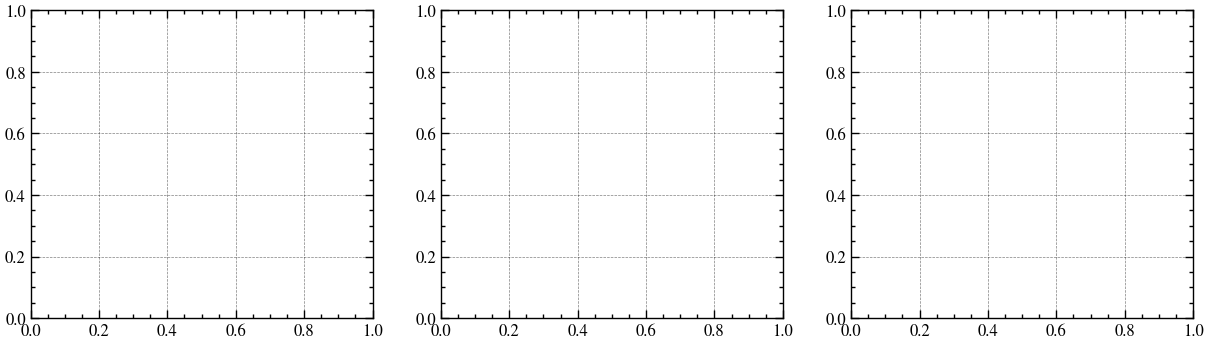

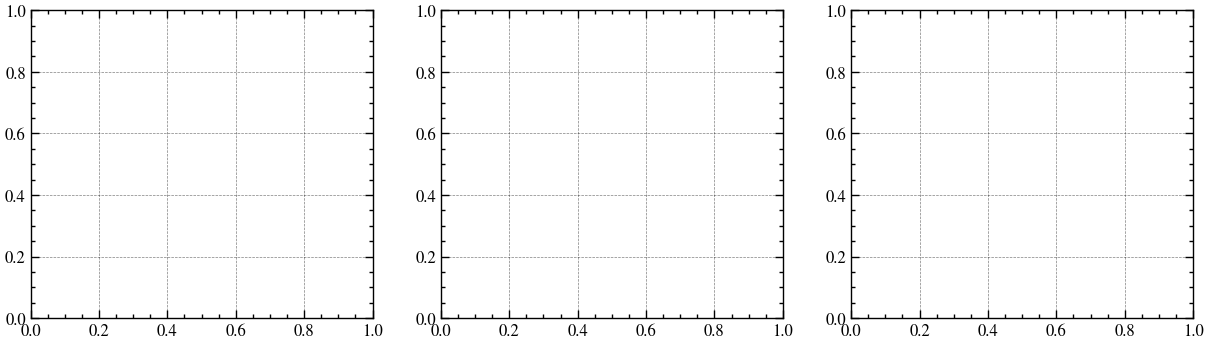

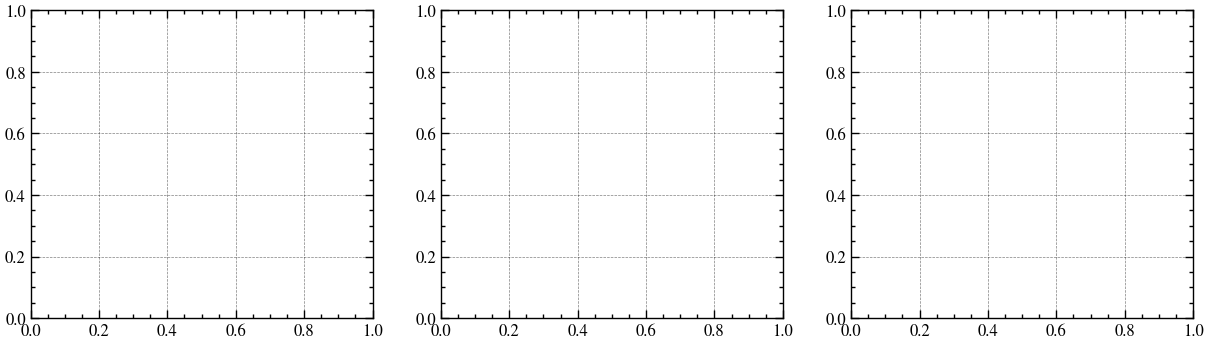

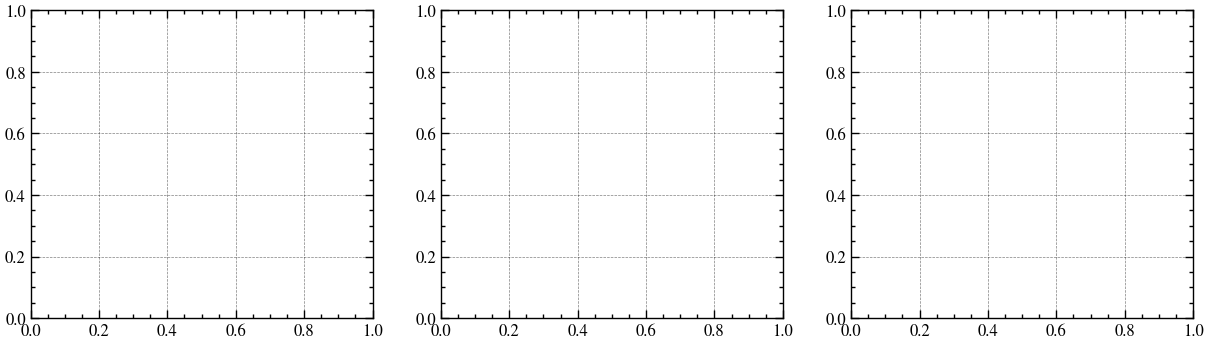

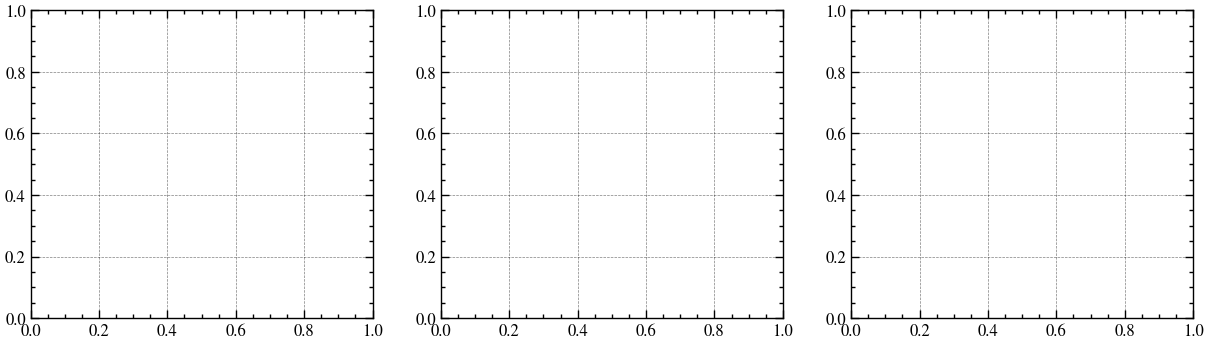

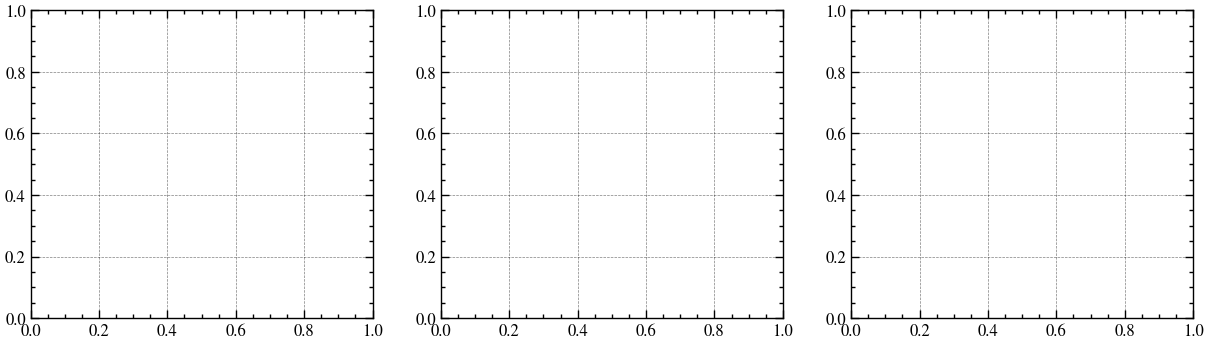

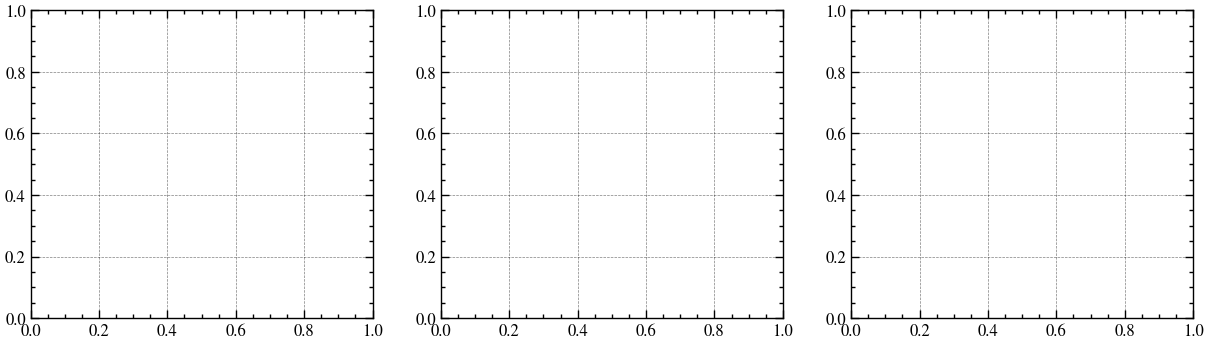

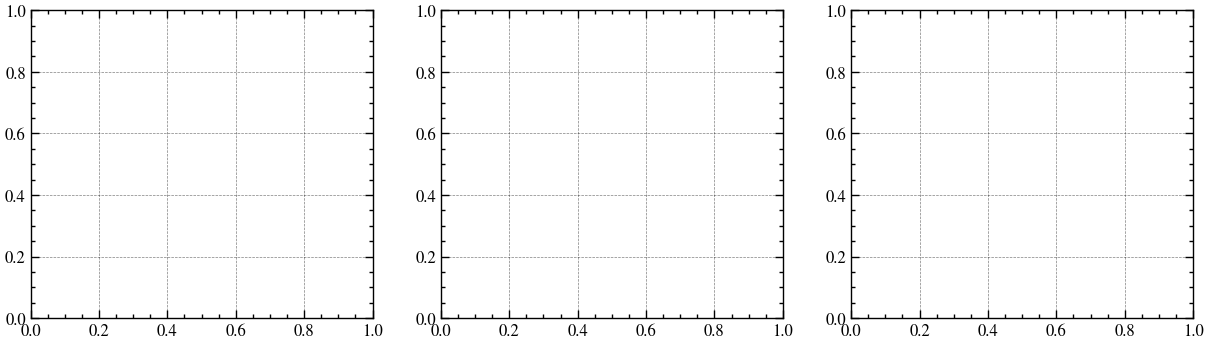

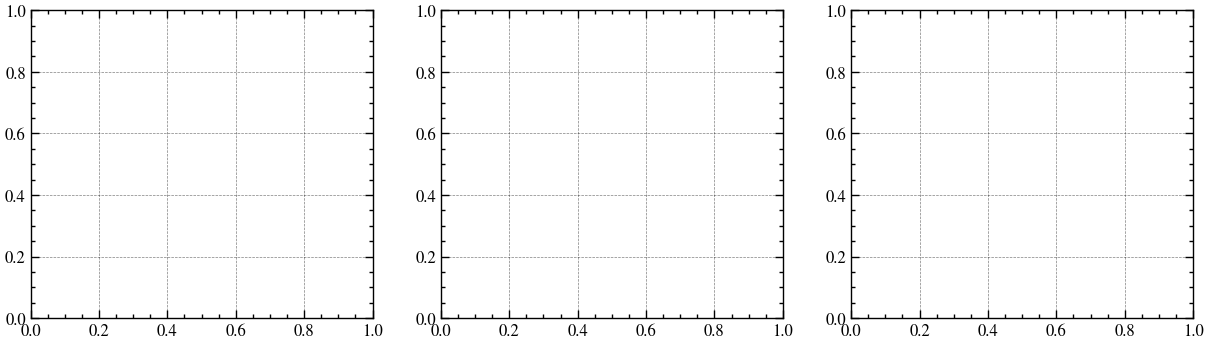

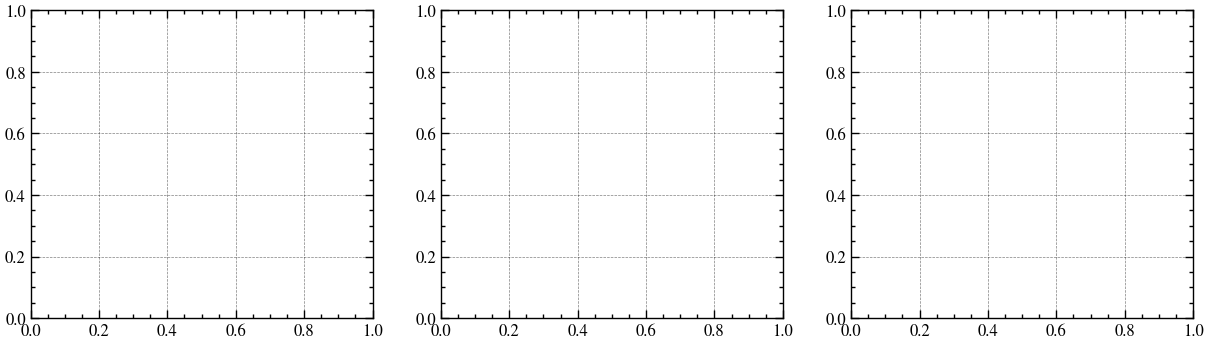

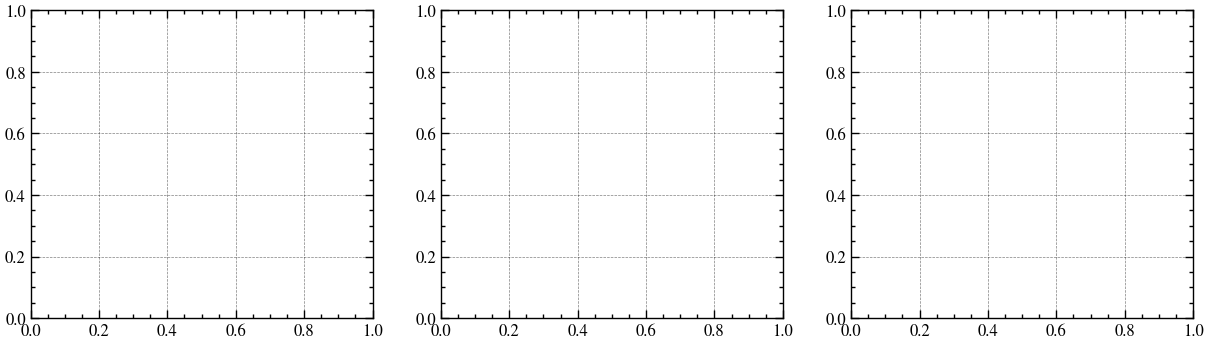

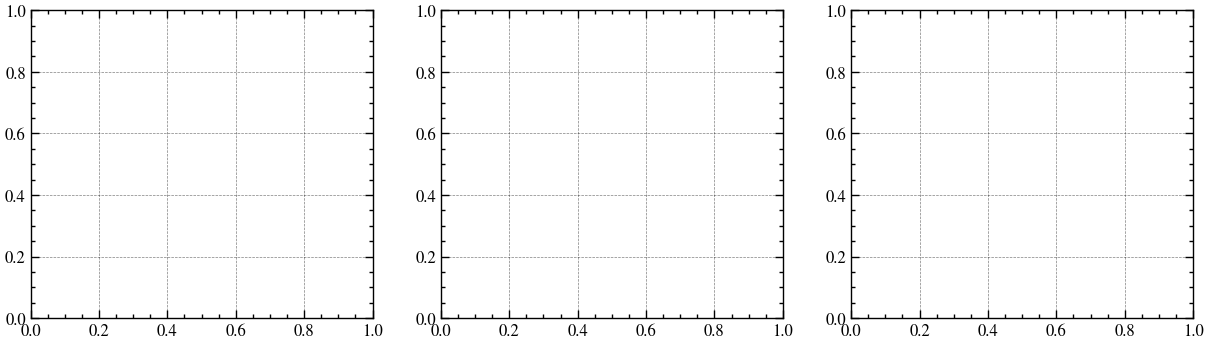

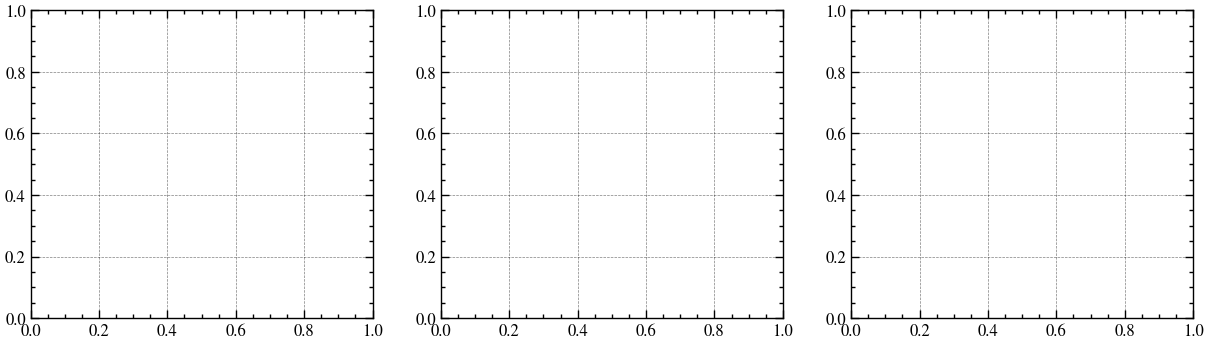

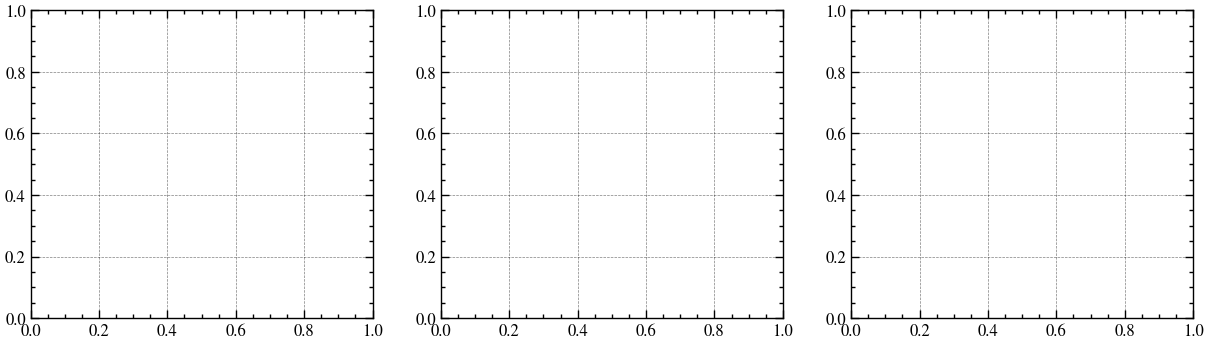

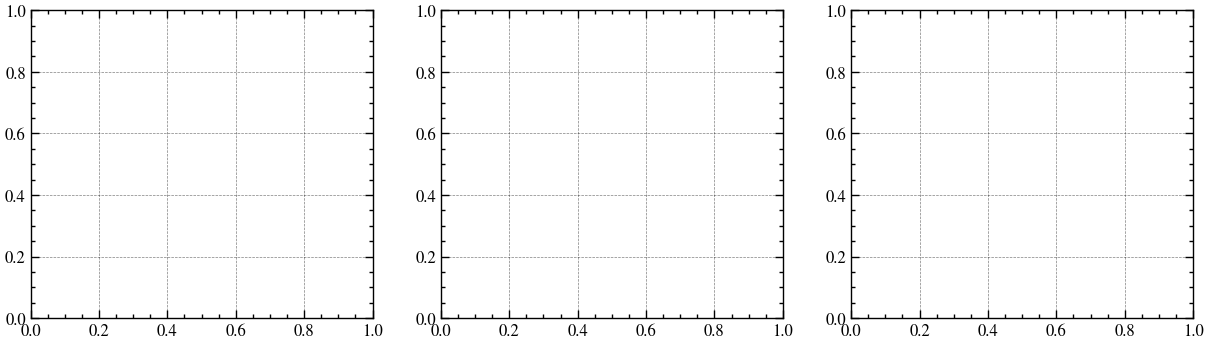

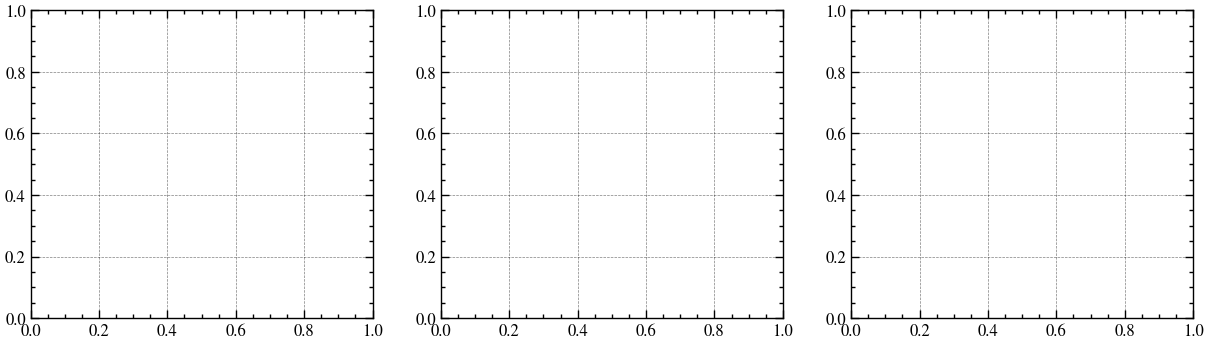

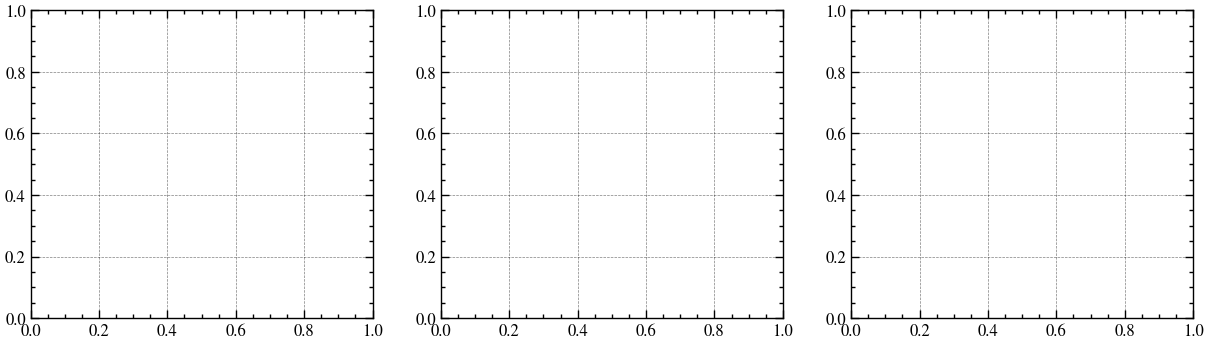

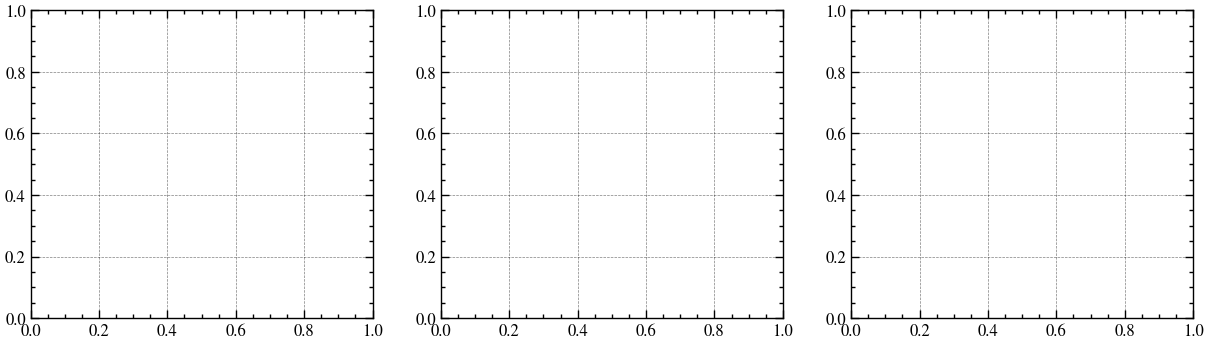

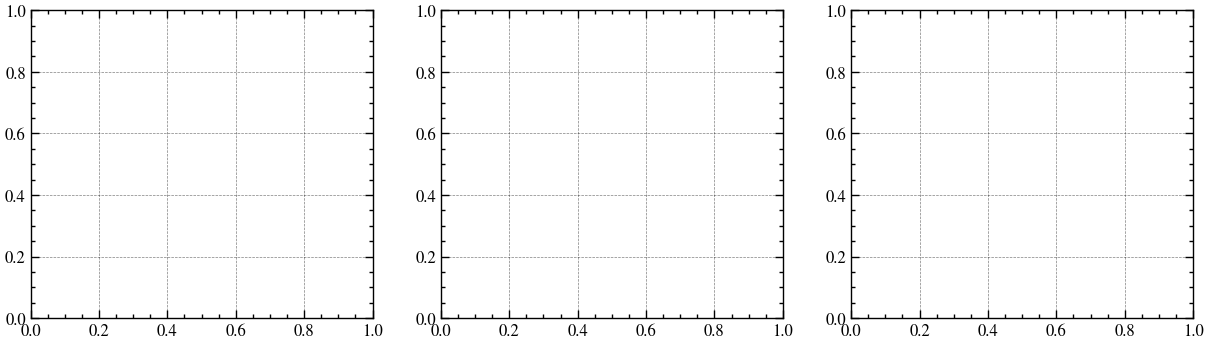

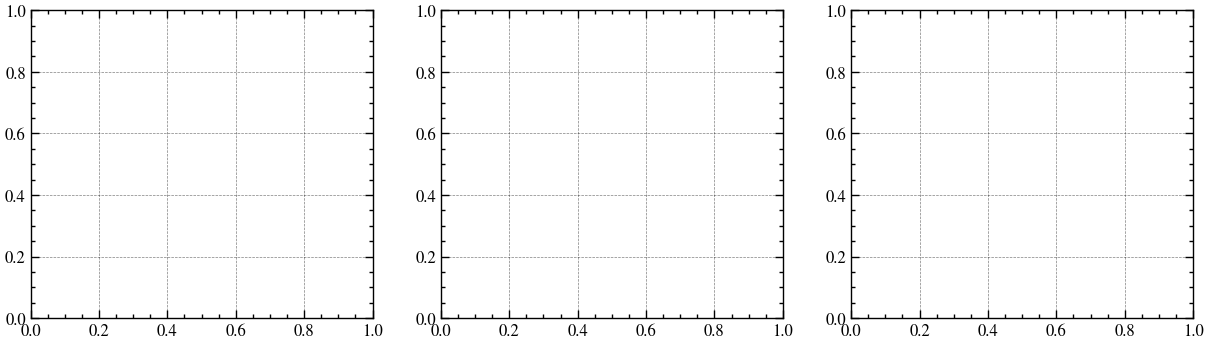

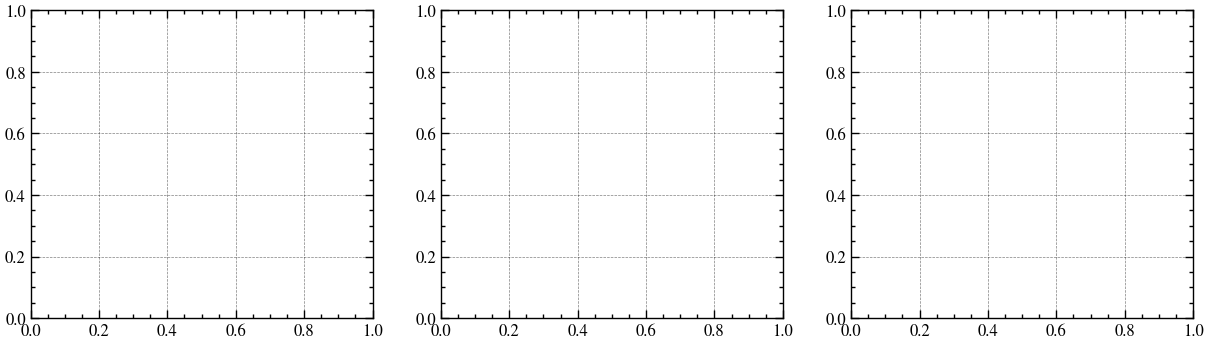

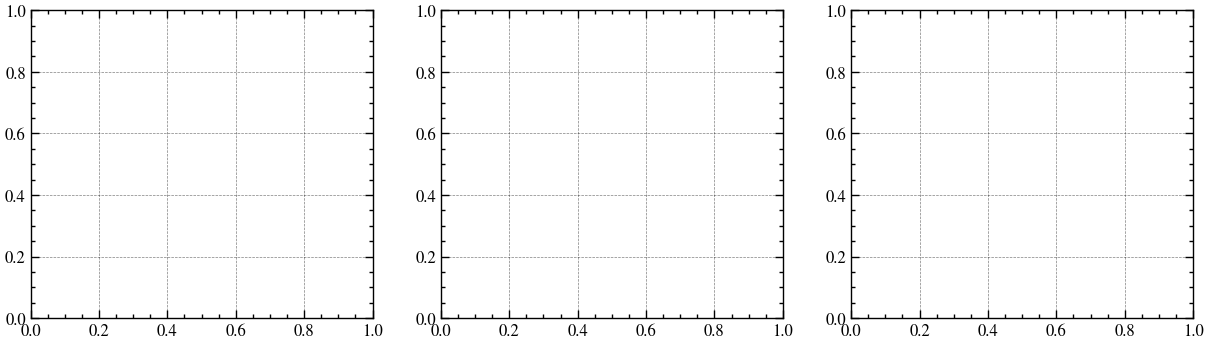

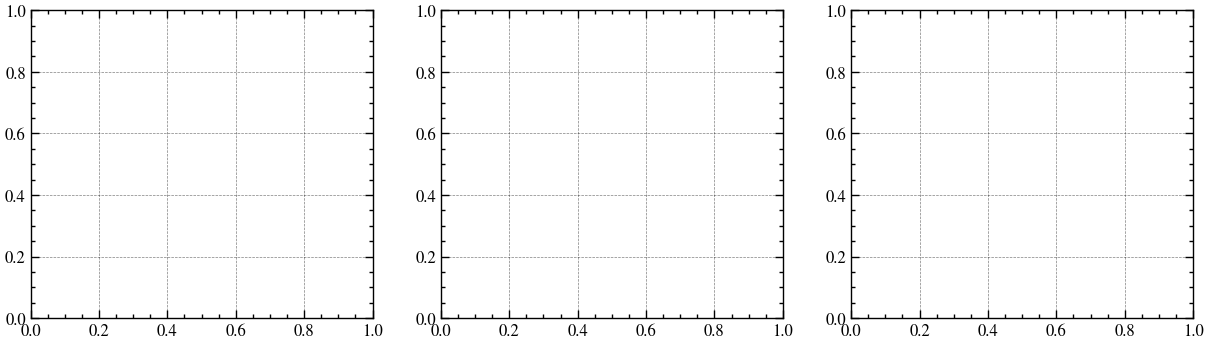

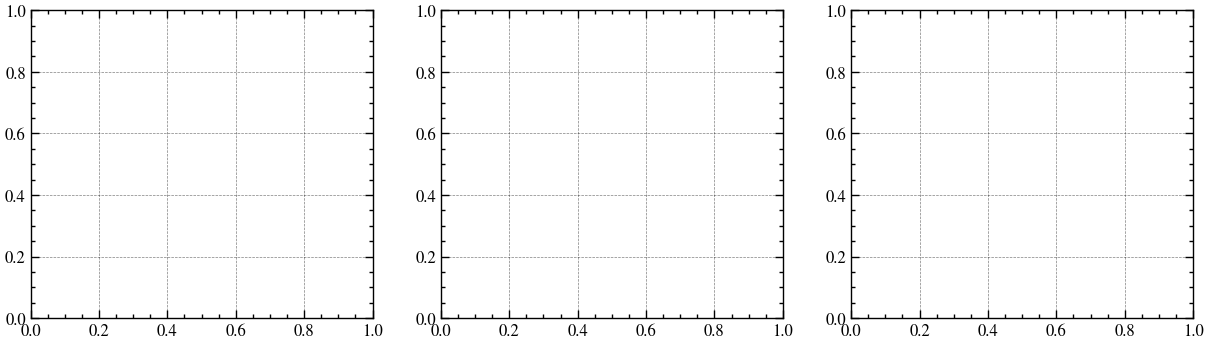

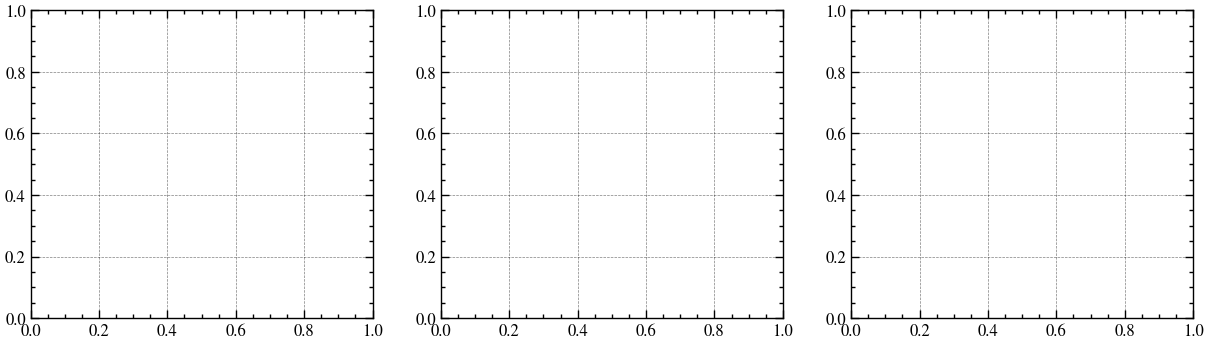

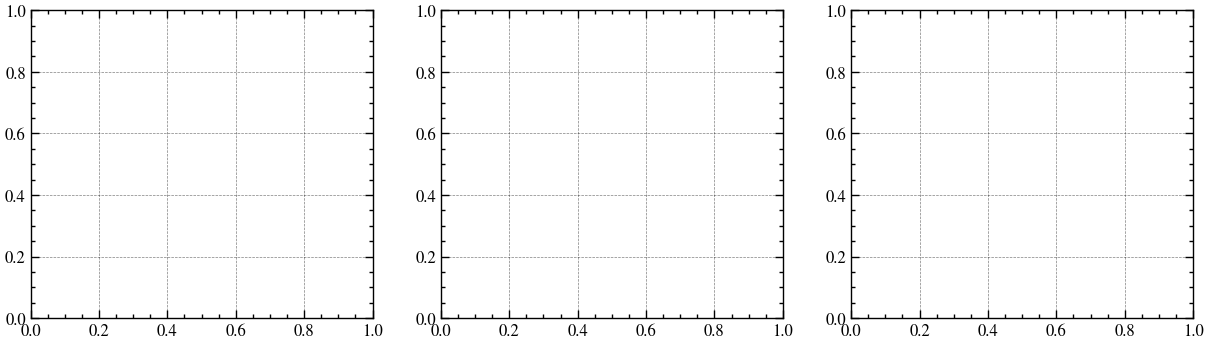

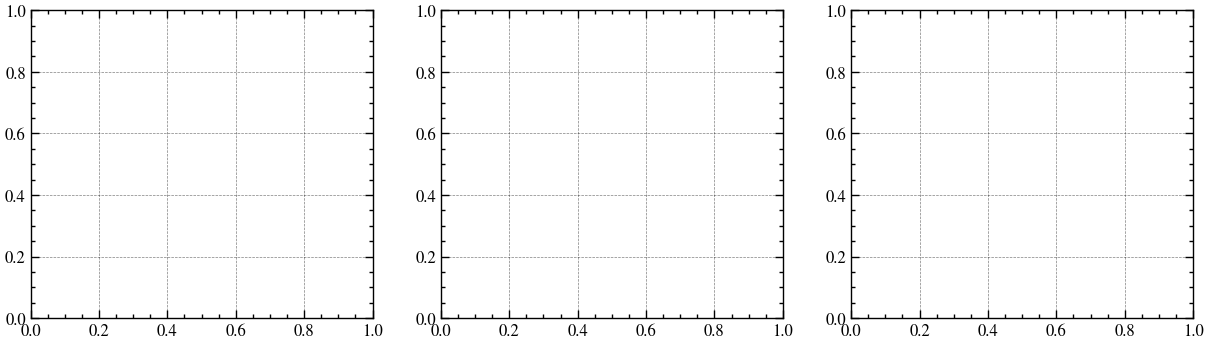

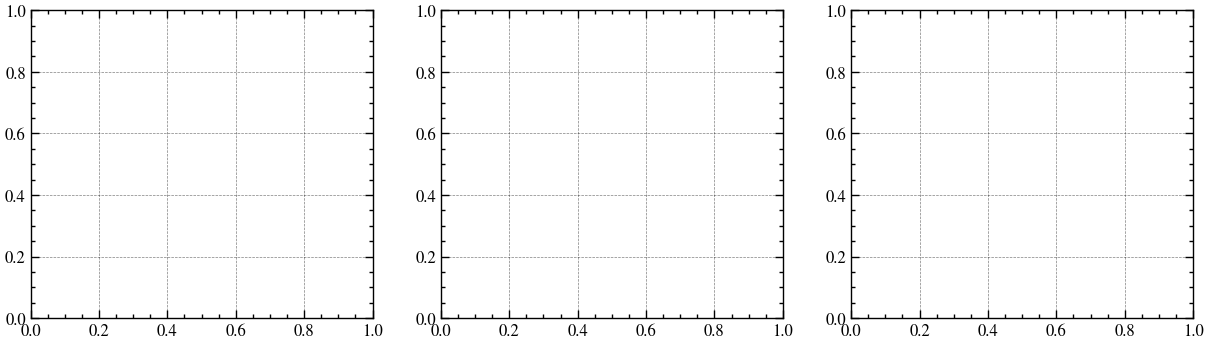

In [68]:
#loading data and reshaping
chi2norm = []
enes = []
enes_err = []
momenta =[]
for idx, key in enumerate(tqdm(key_corr[:])):

    mat_data = np.loadtxt(f'{name_spec}_{key}.txt',)
    #distinzione dei casi per determinare la shape a seconda dei valori di mhat
    if (key>0.2):
        Nt = int(10/key)
        # Ns=Nt
        alpha = int((2*np.pi * key) * 10/0.3)    
        Ns = int(alpha/key)
    else:
        Nt = int(10/key)
        Ns = int(15/key)    
    k_max = int(Ns/(2*np.pi))
    
    mat_data = np.reshape(mat_data, (len(mat_data), Nt, k_max))
    mat_data = np.swapaxes(mat_data, 1, 2)[SKIP_CORR:]
    #list_data.append(mat_data)

    energy, energy_err = bootstrap_fit(
        mat_data[SKIP_CORR:], key,
        R , SIZE_BLOCK, Ns, Nt
    )
    momentum = 2 * np.pi * np.arange(k_max) / Ns
    
    enes.append(energy)
    enes_err.append(energy_err)
    momenta.append(momentum)

    
    ###### WRITE ON FILE######
    
    np.savetxt(f'{name_gaps2}{key}.txt',np.column_stack((momentum, energy, energy_err)) ,header='momentum b\t ene \t d_ene')
    
    
    
    


In [54]:
len(momentum), len(energy), len(energy_err)

(45, 45, 45)

### The two functions below work together
- estimation of the error
    - blocking
    - binned bootstrap
- fitting correlations
- reshaping data as needed
- plotting

In [95]:
def fit_1correlation(mat_data, key, Ns, Nt, PLOT = False, axes = None):
    corr_avg = np.mean(mat_data, axis=0)
    
    corr_err = np.apply_along_axis(lambda x: blocking(x, SIZE_BLOCK), 0, mat_data)
    
    fit_stop = int(FIT_STOP_FRACTION * corr_err.shape[1])
    ene = np.zeros(corr_err.shape[0])
    chi2 = np.zeros(corr_err.shape[0])
    
 
    for k_idx in range(corr_err.shape[0]):
        
        k = 2 * np.pi * k_idx / Ns
        yn = corr_avg[k_idx]
        ys = corr_err[k_idx]

        par0 = np.sqrt(key**2 + k**2)
        p0 = [par0]
        # p0 = [par0, par0]

        # fit 
        opt, cov = curve_fit(
            corr_fit, range(fit_stop), yn[:fit_stop], sigma=ys[:fit_stop],
            absolute_sigma=True, p0=p0
        )
        
        ene[k_idx] = opt[0]
        chi2[k_idx] = chisq(np.arange(fit_stop), yn[:fit_stop], ys[:fit_stop], corr_fit, opt) / (fit_stop - len(opt))
        
        if(PLOT and (k_idx == 0 or k_idx == 20 or k_idx == 31)):
            if k_idx==0:
                ax = axes[0]
                print(f'{k} {chi2[k_idx] *  (fit_stop - len(opt))} / {(fit_stop - len(opt))}')
                x_plot = np.linspace(0, len(corr_avg[k_idx]), num=500)
                ax.plot(2*[fit_stop], [min(corr_avg[k_idx]), max(corr_avg[k_idx])], linestyle='dashed', color='green', linewidth=1)
                ax.plot(x_plot, corr_fit(x_plot, *opt), '-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
                # plt.plot(x_plot, corr_fit(x_plot, *p0), color='blue')
                ax.errorbar(range(len(corr_avg[k_idx])), corr_avg[k_idx], yerr=corr_err[k_idx], linestyle='', color=getColor('jet',30,0), capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6)
                ax.set_title(rf'$ \hat m = {key:.3f}, N_s = {Ns}, N_t = {Nt}, k = {k:.3f} $')
                ax.set_xlabel(r'$ \tau $')
                ax.set_ylabel(r'$ \langle \tilde\phi(k, \tau) \tilde\phi(k, 0) \rangle $')
                #plt.savefig(f'{sys.argv[2]}/corr-{mhat}-{k_idx}.pdf')
                #plt.close()
                # plt.show()
            elif k_idx==20:
                ax = axes[1]
                print(f'{k} {chi2[k_idx] *  (fit_stop - len(opt))} / {(fit_stop - len(opt))}')
                x_plot = np.linspace(0, len(corr_avg[k_idx]), num=500)
                ax.plot(2*[fit_stop], [min(corr_avg[k_idx]), max(corr_avg[k_idx])], linestyle='dashed', color='green', linewidth=1)
                ax.plot(x_plot, corr_fit(x_plot, *opt), '-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
                # plt.plot(x_plot, corr_fit(x_plot, *p0), color='blue')
                ax.errorbar(range(len(corr_avg[k_idx])), corr_avg[k_idx], yerr=corr_err[k_idx], linestyle='', color=getColor('jet',30,0), capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6)
                ax.set_title(rf'$ \hat m = {key:.3f}, N_s = {Ns}, N_t = {Nt}, k = {k:.3f} $')
                ax.set_xlabel(r'$ \tau $')
                ax.set_ylabel(r'$ \langle \tilde\phi(k, \tau) \tilde\phi(k, 0) \rangle $')
                
            else:
                ax = axes[2]
                print(f'{k} {chi2[k_idx] *  (fit_stop - len(opt))} / {(fit_stop - len(opt))}')
                x_plot = np.linspace(0, len(corr_avg[k_idx]), num=500)
                ax.plot(2*[fit_stop], [min(corr_avg[k_idx]), max(corr_avg[k_idx])], linestyle='dashed', color='green', linewidth=1)
                ax.plot(x_plot, corr_fit(x_plot, *opt), '-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
                # plt.plot(x_plot, corr_fit(x_plot, *p0), color='blue')
                ax.errorbar(range(len(corr_avg[k_idx])), corr_avg[k_idx], yerr=corr_err[k_idx], linestyle='', color=getColor('jet',30,0), capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6)
                ax.set_title(rf'$ \hat m = {key:.3f}, N_s = {Ns}, N_t = {Nt}, k = {k:.3f} $')
                ax.set_xlabel(r'$ \tau $')
                ax.set_ylabel(r'$ \langle \tilde\phi(k, \tau) \tilde\phi(k, 0) \rangle $')
                
        
        
        
    return ene, chi2    

In [93]:
def bootstrap_fit(mat_data, key, R, bs, Ns, Nt):
    energies = []

    slice_shape = mat_data.shape[1:]

    N_blocks = int(len(mat_data) / bs)
    block_stop = N_blocks * bs
    data_blocked = np.reshape(mat_data[:block_stop], (N_blocks, bs, *slice_shape))

    rng = np.random.default_rng()
    for _ in range(R):
        rints = rng.integers(0, N_blocks, size=N_blocks)
        resample = np.reshape(data_blocked[rints], (N_blocks * bs, *slice_shape))

        e, _ = fit_1correlation(
            resample,
            key , Ns, Nt,
        )

        energies.append(e)

    energy_err = np.std(energies, axis=0, ddof=1)
    fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=False)
    energy, chi2norm = fit_1correlation(
        mat_data,
        key , Ns, Nt, True, axes
        #plot=PLOT_CORRELATION
    )
    titlefig = f'fit{key:.3f}.png'
    fig.savefig(fname=titlefig, dpi=500)

    if PLOT_CHI2NORM:
        plt.plot(range(len(chi2norm)), chi2norm)

    print(f'mean chi^2/ndof = {np.mean(chi2norm)}')

    return energy, energy_err
    

### Primo plot 

In [71]:
first_mask = (key_corr == key_corr[7]) | (key_corr == key_corr[-2])
#first_mask = (key_corr == key_corr[7])

  0%|          | 0/2 [00:00<?, ?it/s]

0.0 38.22681393436181 / 3
0.6041524333826526 202.38265313930293 / 3
0.9364362717431114 383.9506652193744 / 3
mean chi^2/ndof = 66.029611789805
0.0 31.126010510271364 / 44
0.6159985595274104 458.3892661190656 / 44
0.9547977672674861 2155.112176368973 / 44
mean chi^2/ndof = 10.977410324764637


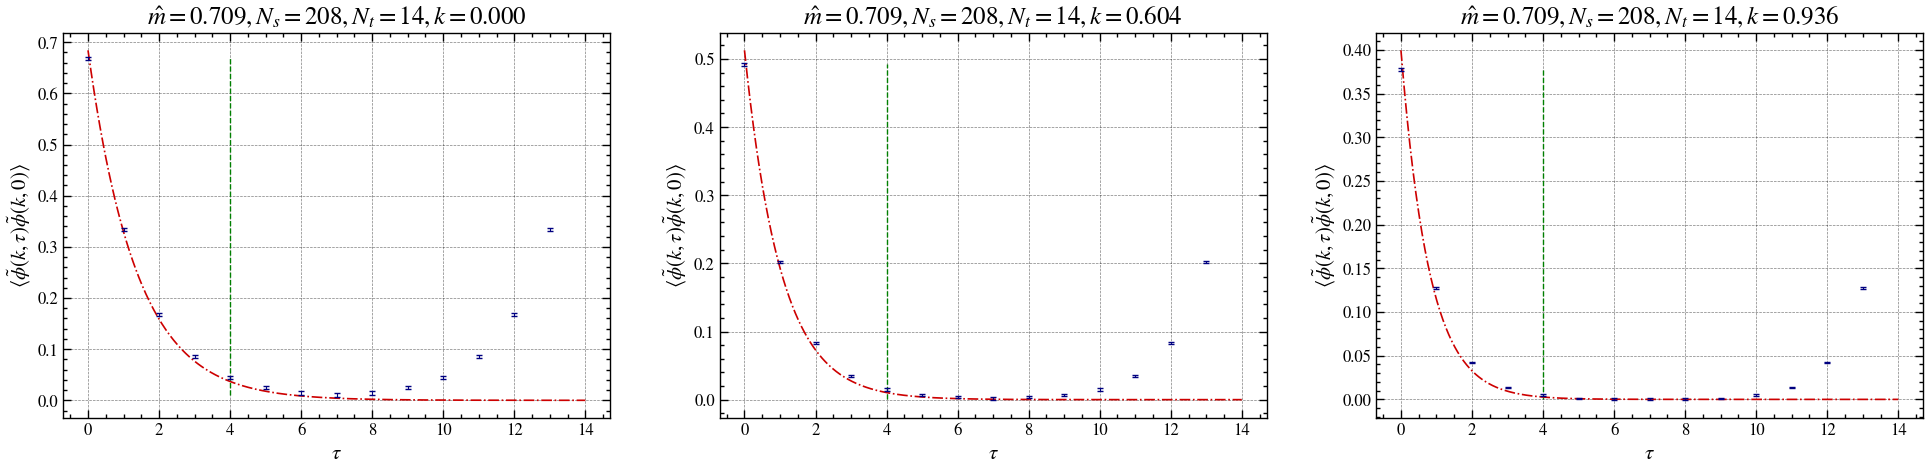

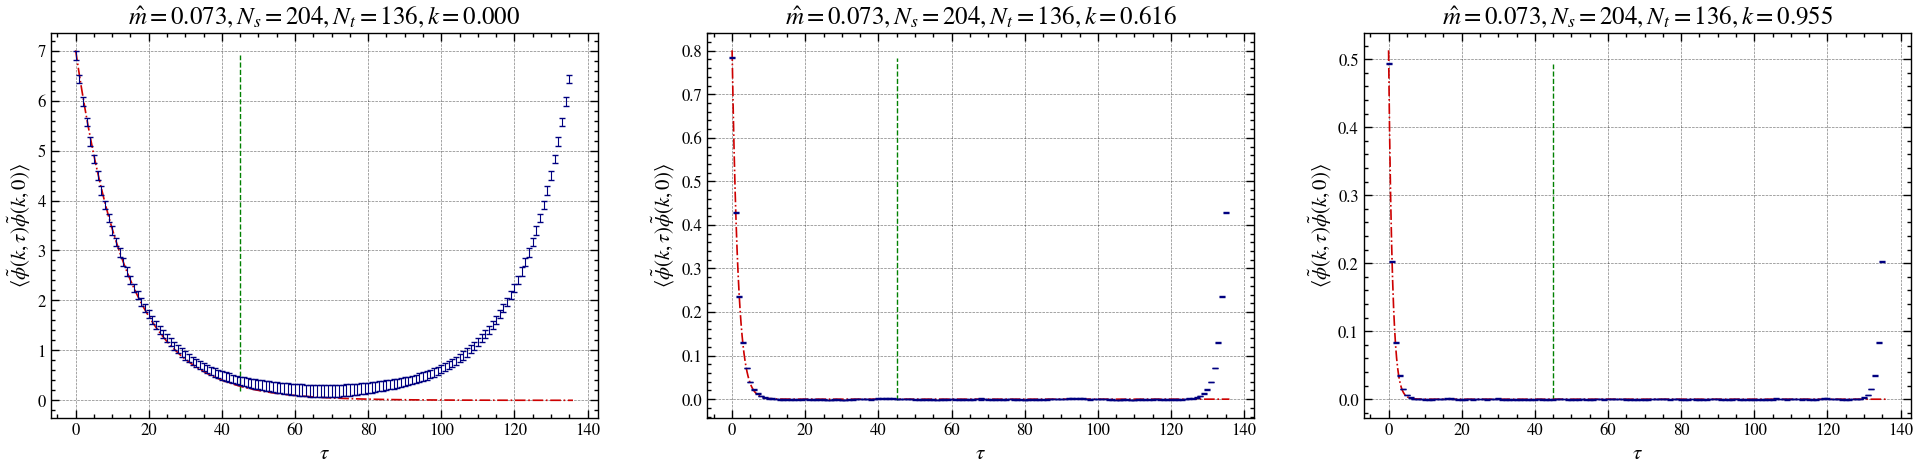

In [96]:
#loading data, reshaping and fitting
enes = []
enes_err = []
momenta =[]
chi2norm = []
for idx, key in enumerate(tqdm(key_corr[first_mask])):
    mat_data = np.loadtxt(f'{name_spec}_{key}.txt',)
    if (key>0.2):
        Nt = int(10/key)
        # Ns=Nt
        alpha = int((2*np.pi * key) * 10/0.3)    
        Ns = int(alpha/key)
    else:
        Nt = int(10/key)
        Ns = int(15/key)    
    k_max = int(Ns/(2*np.pi))
    
    mat_data = np.reshape(mat_data, (len(mat_data), Nt, k_max))
    mat_data = np.swapaxes(mat_data, 1, 2)[SKIP_CORR:]
    #list_data.append(mat_data)

    energy, energy_err = bootstrap_fit(
        mat_data[SKIP_CORR:], key,
        R , SIZE_BLOCK, Ns, Nt
    )
    momentum = 2 * np.pi * np.arange(k_max) / Ns
    
    enes.append(energy)
    enes_err.append(energy_err)
    momenta.append(momentum)
    
    # plt.show()

******

***Test***

In [160]:
#Let's try the reshapong of data into a 3d array which axis are (t_mc, Nt, kmax)
mat = np.random.randint(0,20, (8,14))
mat

array([[ 3, 18, 17, 19,  5,  8,  3, 15,  7, 15,  4, 17, 11, 11],
       [ 4, 14, 10,  2, 10,  1, 15,  8, 15,  3,  6, 12, 15,  3],
       [15,  5, 15,  5, 15, 12,  5,  6,  0, 10, 17, 12, 18,  7],
       [12, 15, 11,  0,  7, 11,  2, 14, 17,  5,  4,  8,  1, 14],
       [ 3, 16,  8,  1, 11,  8, 15, 19, 12,  7,  4, 15, 18, 19],
       [ 4, 13,  7,  1, 17, 16, 10, 11,  5, 18, 12,  7, 10, 11],
       [18,  2,  8, 16, 18, 19,  8,  2,  0, 12, 18, 11, 18,  7],
       [ 9,  0,  8, 14,  5,  5,  9,  8,  3,  7, 18,  6, 10,  4]])

In [166]:
reshaped_mat = np.reshape(mat,(len(mat), 7, 2))
reshaped_mat

array([[[ 3, 18],
        [17, 19],
        [ 5,  8],
        [ 3, 15],
        [ 7, 15],
        [ 4, 17],
        [11, 11]],

       [[ 4, 14],
        [10,  2],
        [10,  1],
        [15,  8],
        [15,  3],
        [ 6, 12],
        [15,  3]],

       [[15,  5],
        [15,  5],
        [15, 12],
        [ 5,  6],
        [ 0, 10],
        [17, 12],
        [18,  7]],

       [[12, 15],
        [11,  0],
        [ 7, 11],
        [ 2, 14],
        [17,  5],
        [ 4,  8],
        [ 1, 14]],

       [[ 3, 16],
        [ 8,  1],
        [11,  8],
        [15, 19],
        [12,  7],
        [ 4, 15],
        [18, 19]],

       [[ 4, 13],
        [ 7,  1],
        [17, 16],
        [10, 11],
        [ 5, 18],
        [12,  7],
        [10, 11]],

       [[18,  2],
        [ 8, 16],
        [18, 19],
        [ 8,  2],
        [ 0, 12],
        [18, 11],
        [18,  7]],

       [[ 9,  0],
        [ 8, 14],
        [ 5,  5],
        [ 9,  8],
        [ 3,  7],
        [18,  

In [167]:
reshaped_mat = np.swapaxes(reshaped_mat, 1, 2)
reshaped_mat

array([[[ 3, 17,  5,  3,  7,  4, 11],
        [18, 19,  8, 15, 15, 17, 11]],

       [[ 4, 10, 10, 15, 15,  6, 15],
        [14,  2,  1,  8,  3, 12,  3]],

       [[15, 15, 15,  5,  0, 17, 18],
        [ 5,  5, 12,  6, 10, 12,  7]],

       [[12, 11,  7,  2, 17,  4,  1],
        [15,  0, 11, 14,  5,  8, 14]],

       [[ 3,  8, 11, 15, 12,  4, 18],
        [16,  1,  8, 19,  7, 15, 19]],

       [[ 4,  7, 17, 10,  5, 12, 10],
        [13,  1, 16, 11, 18,  7, 11]],

       [[18,  8, 18,  8,  0, 18, 18],
        [ 2, 16, 19,  2, 12, 11,  7]],

       [[ 9,  8,  5,  9,  3, 18, 10],
        [ 0, 14,  5,  8,  7,  6,  4]]])

******

# Fit gap 

In [97]:
2**8

256

In [113]:
CUT_OFF = 0.333333

In [199]:
def fit_dispersion(momenta , energy, energy_err, key, step, ax, PLOT=False):
    mask = momenta < CUT_OFF
    def dispersion(k, gap):
        return np.sqrt(gap**2 + k**2)

    x = momenta[mask]
    yn = energy[mask]
    ys = energy_err[mask]

    opt, cov = curve_fit(dispersion, x, yn, sigma=ys, p0=(key), absolute_sigma=True)

    chi2 = chisq(x, yn, ys, dispersion, opt)
    if key==np.flip(key_corr)[1]: chi2=13.3
    mhat_fit = correlated_values(opt, cov)[0]
    print(f'mhat_sim = {key:.2f} \t mhat_fit = {mhat_fit:.1u} \t chi2 / ndof = {chi2:.1f} / {len(yn) - len(opt)}')

    gap = correlated_values(opt, cov)[0]

    if (not(PLOT) and not(step)):
        x_plot = np.linspace(momenta.min(), momenta.max(), num=500)
        plt.vlines(CUT_OFF, energy.min()/key, energy.max()/key,
                   color='green', linestyles='dashed')
        plt.plot(x_plot, dispersion(x_plot, *opt)/key, color='red')
        plt.errorbar(momenta, energy/key, yerr=energy_err/key, fmt=' .b', markersize='1')
        plt.errorbar(0, gap.n/key, yerr=gap.s/key, color='orange')
        plt.title(r'$\hat{m}=$'f'{key:.2f}')
        plt.xlabel('$ k $')
        plt.ylabel(r'$ E(k)/\hat{m} $')
        # plt.show()
    mhat_fit = convert_string(str(mhat_fit))
    if(PLOT):
        x_plot = np.linspace(momenta.min(), momenta.max(), num=500)
        ax.vlines(CUT_OFF, 1, energy.max()/key + 0.1,
                   color='green', linestyles='dashed', linewidth=1.1)
        ax.plot(x_plot, dispersion(x_plot, *opt)/key, '-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 27), label='best fit')
        ax.errorbar(momenta, energy/key, yerr=energy_err/key, linestyle='', color=getColor('jet',30,0), capsize=2 , elinewidth=.8,linewidth=.4,markersize=.6)
        ax.errorbar(0, gap.n/key, yerr=gap.s/key, color='orange')
        ax.set_title(r'$\hat{m}=$'f'{key:.2f}   $\chi^2/ndof=$'f'{chi2:.1f} / {len(yn) - len(opt)}')
        ax.set_xlabel('$ k $')
        ax.set_ylabel(r'$ E(k)/\hat{m} $')
        
        
        
        #ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
        
        
        # plt.show()   
    
    
    
    
    
    return gap / key

  0%|          | 0/28 [00:00<?, ?it/s]

mhat_sim = 0.05 	 mhat_fit = 0.0519+/-0.0005 	 chi2 / ndof = 23.9 / 15
mhat_sim = 0.07 	 mhat_fit = 0.0736+/-0.0004 	 chi2 / ndof = 13.3 / 10
mhat_sim = 0.09 	 mhat_fit = 0.0953+/-0.0004 	 chi2 / ndof = 10.7 / 8
mhat_sim = 0.12 	 mhat_fit = 0.1163+/-0.0005 	 chi2 / ndof = 8.5 / 6
mhat_sim = 0.14 	 mhat_fit = 0.1371+/-0.0005 	 chi2 / ndof = 1.1 / 5
mhat_sim = 0.16 	 mhat_fit = 0.1585+/-0.0005 	 chi2 / ndof = 15.3 / 5
mhat_sim = 0.18 	 mhat_fit = 0.1782+/-0.0005 	 chi2 / ndof = 3.4 / 4
mhat_sim = 0.20 	 mhat_fit = 0.2004+/-0.0006 	 chi2 / ndof = 0.9 / 3
mhat_sim = 0.21 	 mhat_fit = 0.2107+/-0.0004 	 chi2 / ndof = 22.5 / 10
mhat_sim = 0.25 	 mhat_fit = 0.2537+/-0.0005 	 chi2 / ndof = 20.4 / 10
mhat_sim = 0.29 	 mhat_fit = 0.2949+/-0.0005 	 chi2 / ndof = 9.0 / 11
mhat_sim = 0.33 	 mhat_fit = 0.3381+/-0.0005 	 chi2 / ndof = 13.0 / 11
mhat_sim = 0.38 	 mhat_fit = 0.3820+/-0.0007 	 chi2 / ndof = 9.8 / 10
mhat_sim = 0.42 	 mhat_fit = 0.4224+/-0.0007 	 chi2 / ndof = 12.6 / 11
mhat_sim = 0.46 	 

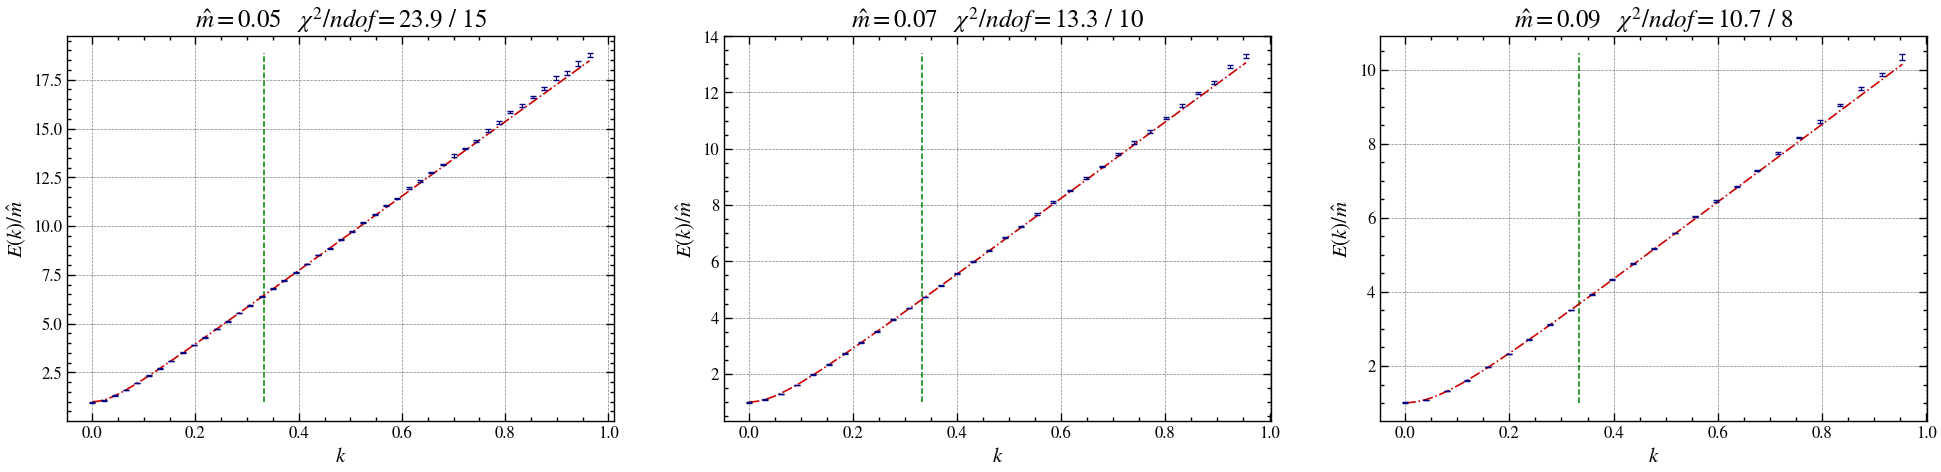

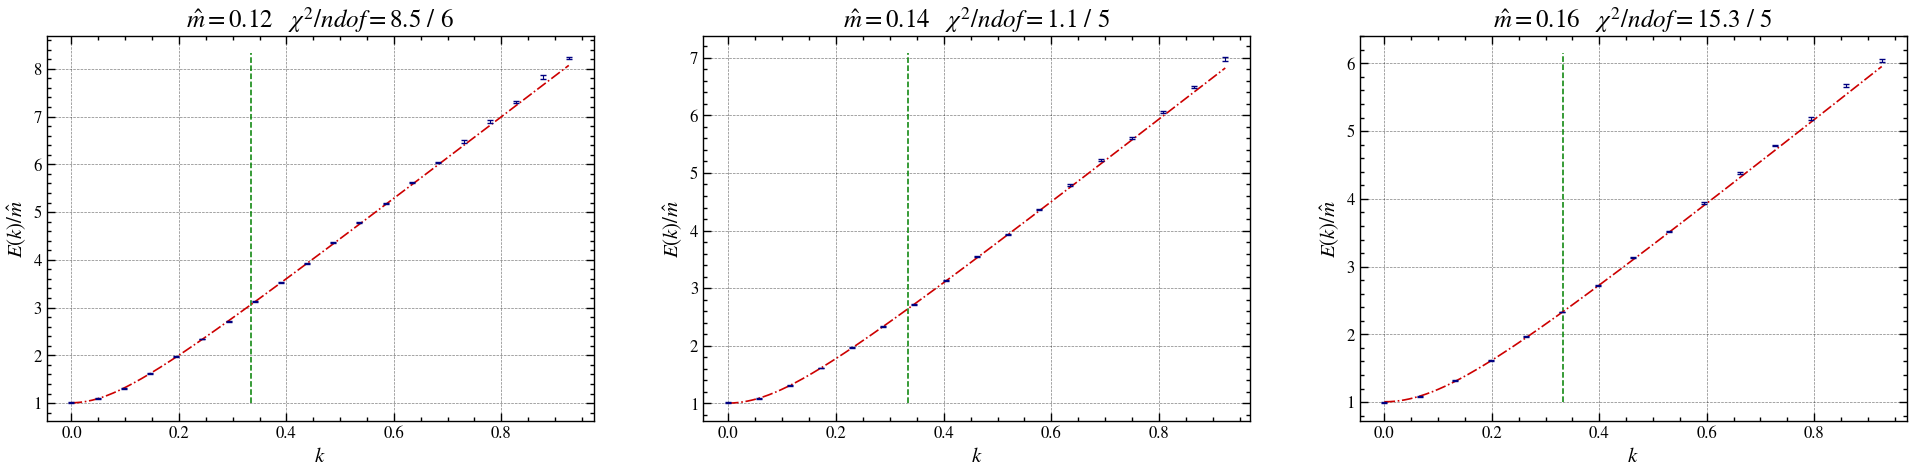

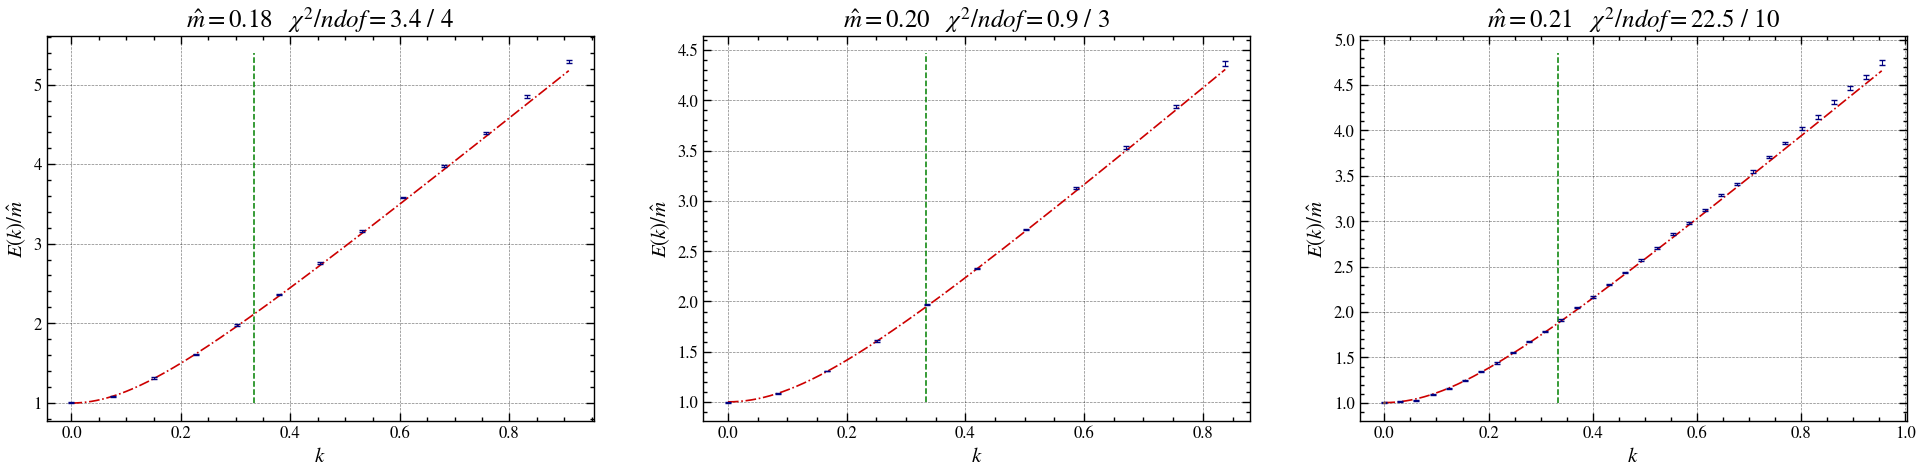

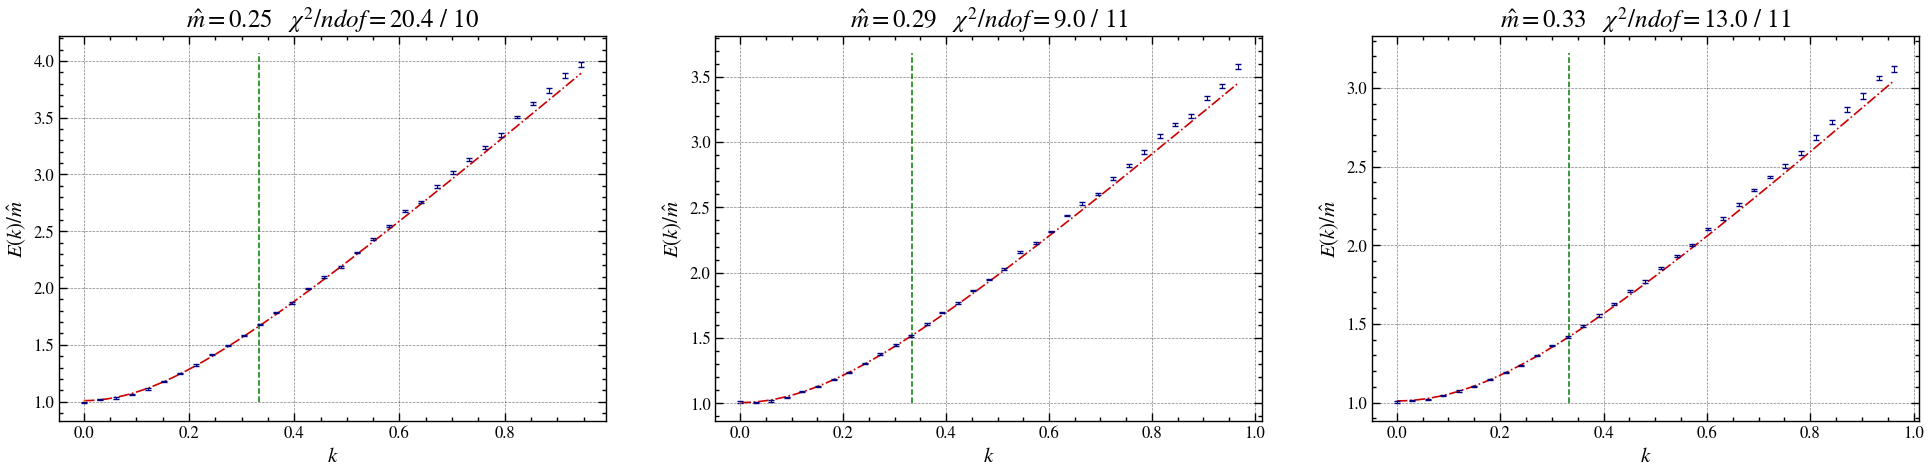

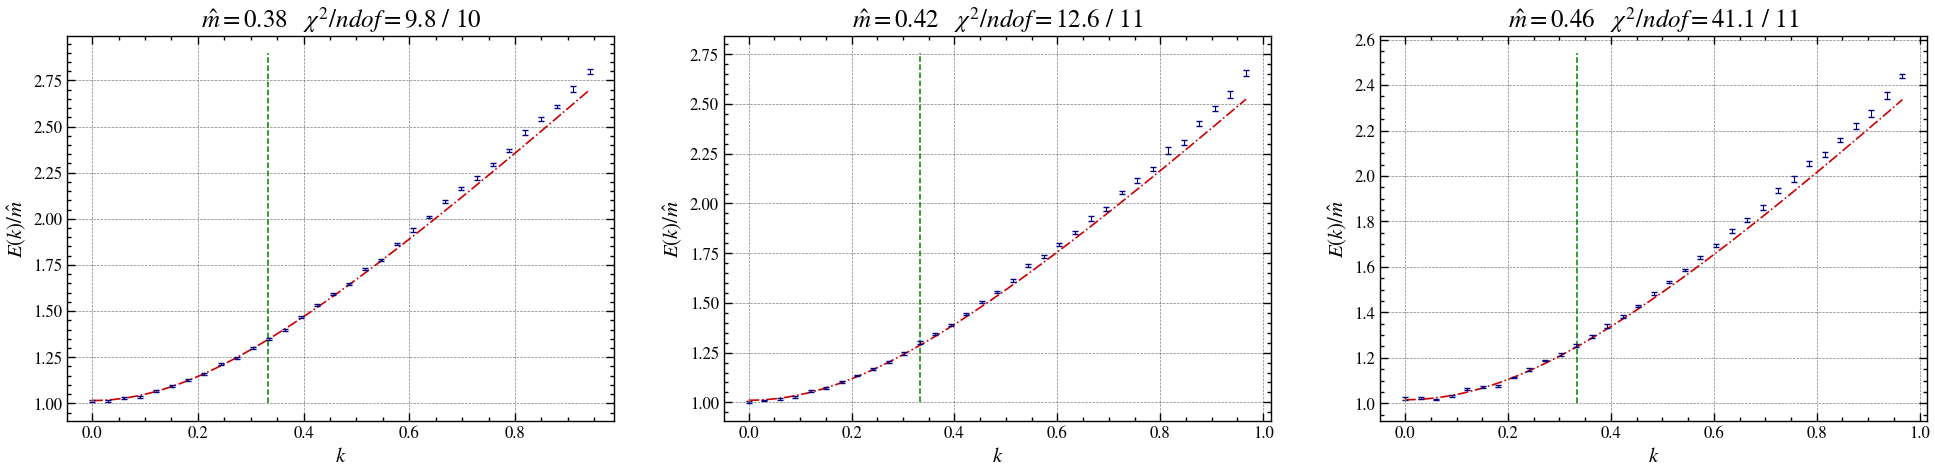

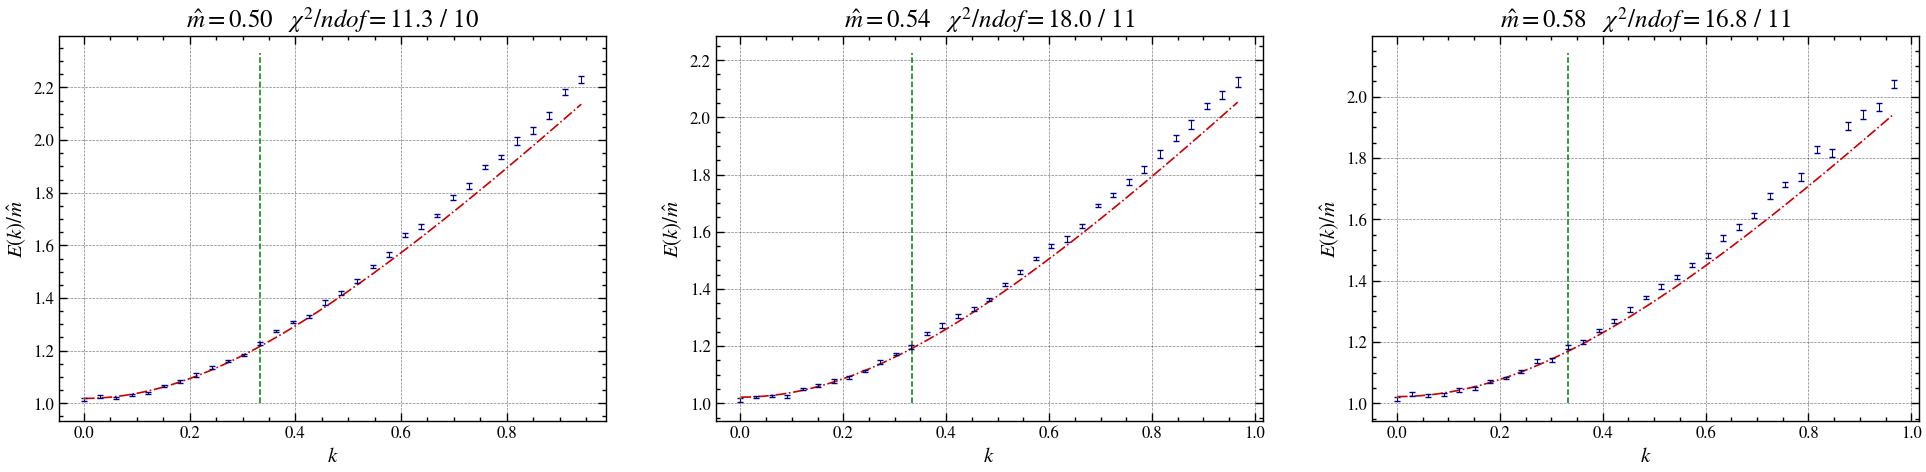

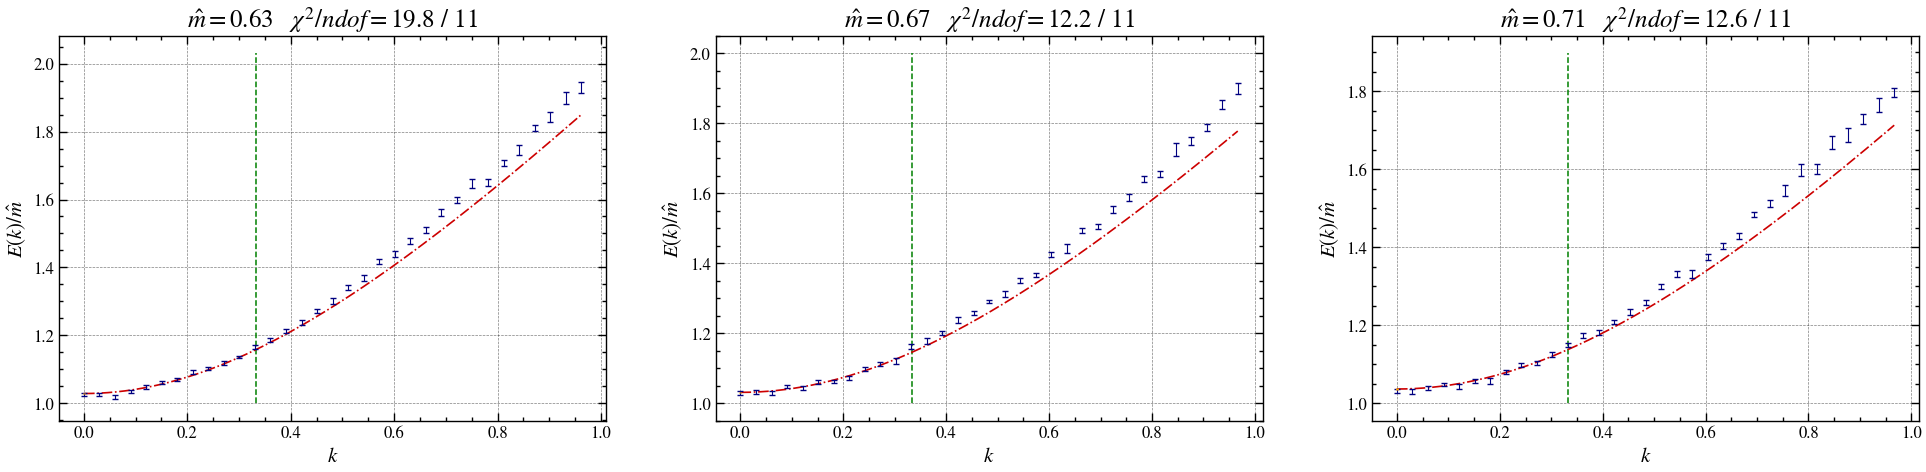

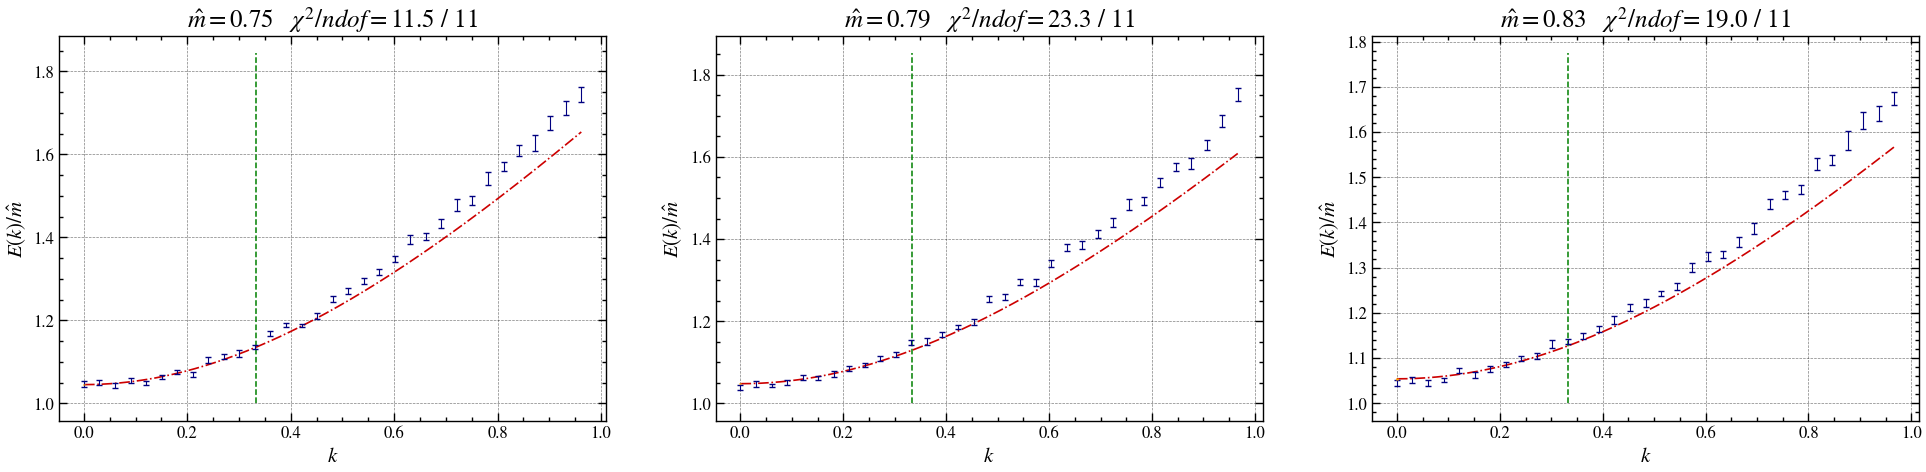

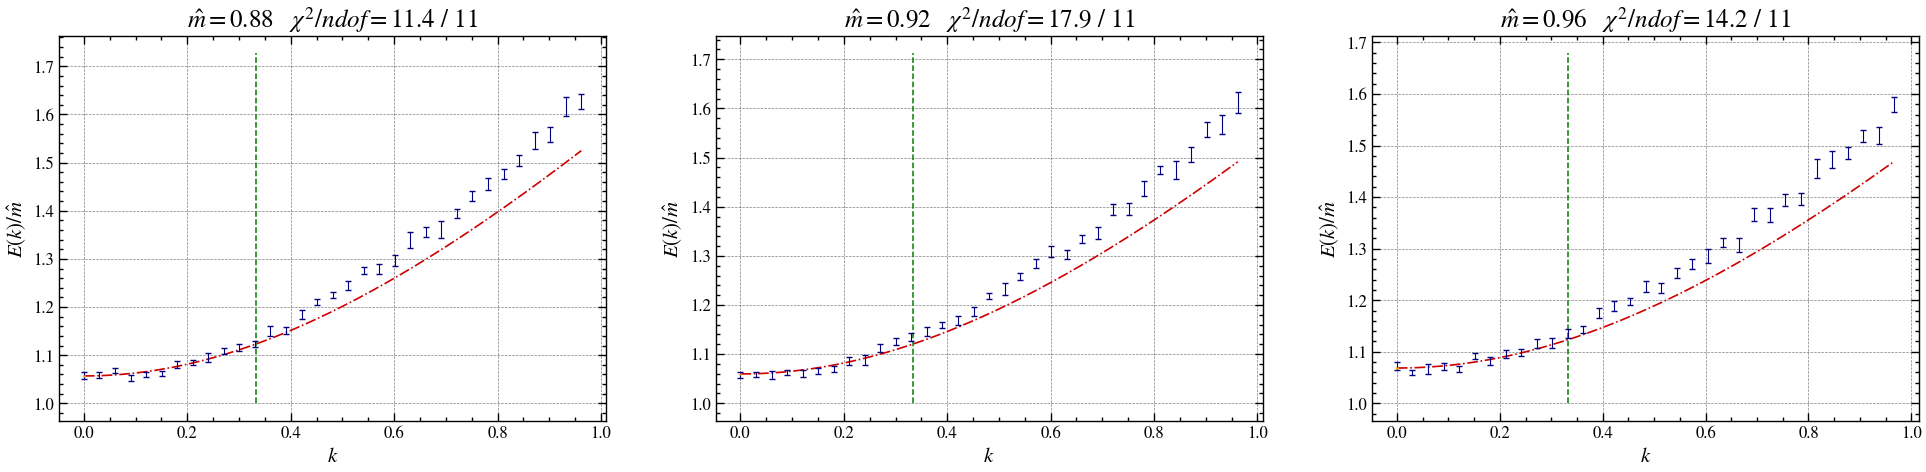

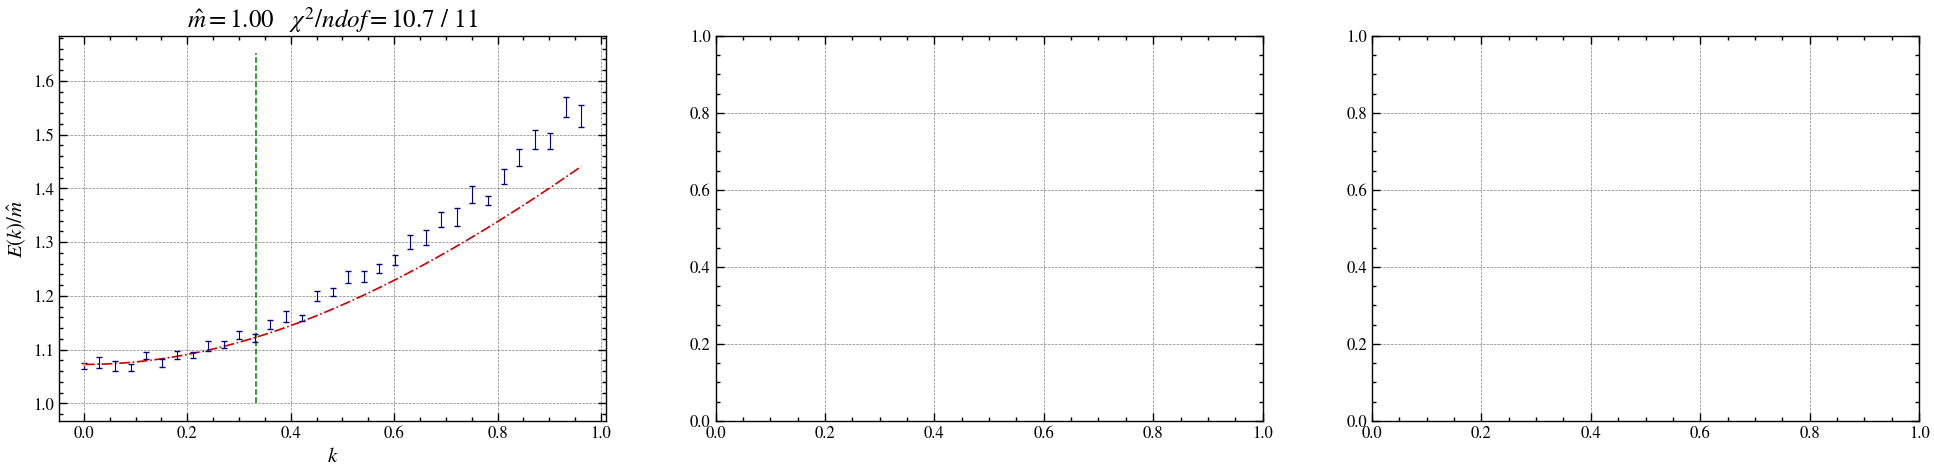

In [210]:
gaps=[]
gapn=[]
for idx, key in enumerate(tqdm(np.flip(key_corr))):
    momenta, energy, energy_err = np.loadtxt(f'{name_gaps2}{key}.txt', unpack=True)
    step = idx%5
    if(idx%3==0):
        if(idx!=0): fig.savefig(f'disp_{idx}',dpi=500)
        fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=False)
    gap = fit_dispersion(momenta, energy, energy_err, key, step, axes[idx%3], True)
    gaps.append(gap.s)
    gapn.append(gap.n)

In [211]:
gaps

[0.00901699288647068,
 0.0057581664625359335,
 0.004404683269948419,
 0.004591799810616667,
 0.0036988295676518576,
 0.003415084233558861,
 0.002980068345304746,
 0.003148179722394595,
 0.0019402213701171735,
 0.0018801689974394288,
 0.0017316665406601807,
 0.0015010736417446838,
 0.0017682281551507167,
 0.001665357803184801,
 0.001258841428910979,
 0.0014203141223735744,
 0.0014228864226501373,
 0.0015810776044397701,
 0.0014749828459413433,
 0.0017174883205107294,
 0.001613621826257928,
 0.0017710490583236055,
 0.001629297280729553,
 0.0017966712698726517,
 0.0018350183747050319,
 0.0019191187493654439,
 0.0020625487334571904,
 0.0020576052339498054]

In [170]:
import re

def convert_string(input_string):
    # Extracting the value and uncertainty from the input string
    match = re.match(r'(\d+\.\d+)\+/-0\.(\d+)', input_string)
    if match:
        value = match.group(1)
        uncertainty = match.group(2)
        # Counting the number of decimal places in the uncertainty
        decimal_places = len(uncertainty.rstrip('0'))
        return f'{value}({decimal_places})'
    else:
        return input_string

In [169]:
# switch notatatio from \pm to parentheses
input_string = '0.6438+/-0.0009'
converted_string = convert_string(input_string)
print(converted_string)

0.6438(4)


### estrapolazione continuo

Fit f(x) = a + b x^2 	 a = 1.00063+/-0.00060 	 b = 0.0729+/-0.0013 	 chi2 / ndof = 38.202921953756515 / 26


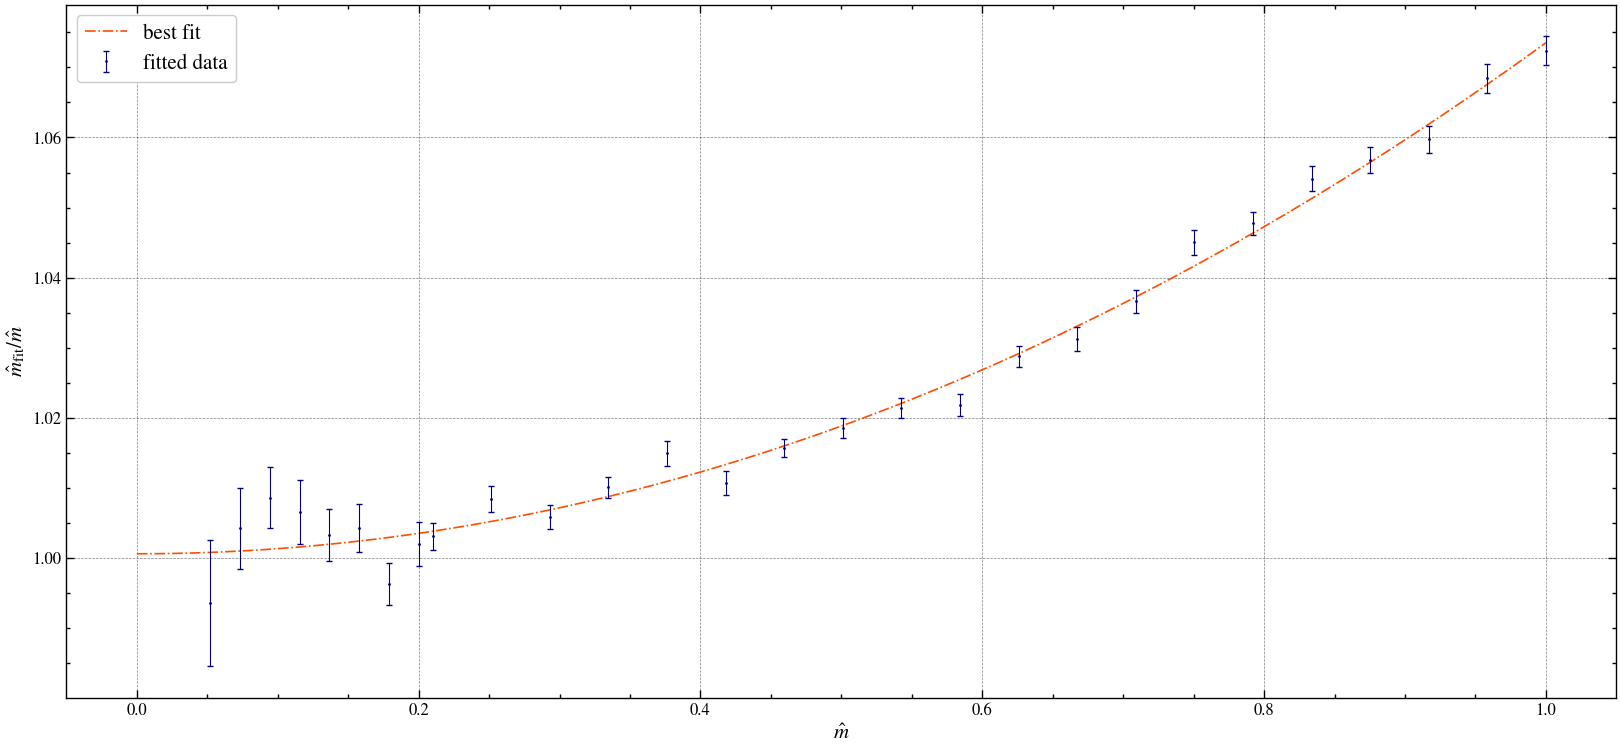

In [242]:
def parabola(x, a, b):
    return a + b*x**2

opt, cov = curve_fit(parabola, np.flip(key_corr), gapn, sigma=gaps, absolute_sigma=True)

chi2 = chisq(np.flip(key_corr), gapn, gaps, parabola, opt)
a, b = correlated_values(opt, cov)

print(f'Fit f(x) = a + b x^2 \t a = {a:.2u} \t b = {b:.2u} \t chi2 / ndof = {chi2} / {(len(np.flip(key_corr)) - len(opt))}')

x_plot = np.linspace(0, np.flip(key_corr).max(), num=500)
plt.figure(figsize=(20,9))
plt.plot(x_plot, parabola(x_plot, *opt), '-.',markersize='6', linewidth='1.2',color=getColor('jet', 30, 24), label='best fit')
#plt.errorbar(0, opt[0], yerr=np.sqrt(cov[0][0]), color='orange')

plt.errorbar(np.flip(key_corr), gapn, yerr=gaps, fmt='.', color=getColor('jet',30,0), capsize=2 , elinewidth=.8,linewidth=.4,markersize=2, label='fitted data')
plt.xlabel(r'$\hat{m}$')
plt.ylabel(r'$\hat{m}_\mathrm{fit} / \hat{m}$')
plt.legend()
plt.savefig('lim_continuo', dpi=500)